# Decision Tree and Ensemble Models

This notebook deals with the Decision Tree Classifier and various Ensemble Models/ Methods.
First, we want to compare the performance of a standard DecisionTreeClassifier to Ensemble Models such as examples for Bagging and Boosting on the preprocessed training data.
Secondly, halving grid search is used to perform hyperparameter tuning for each model with included cross-validation, different resampling methods, and furthermore, principle component analysis (PCA) is taken into account. 
Eventually, precision and recall curves are used for analysis and the final evaluation of the best performing classifier out of the selected Decision Tree and Ensemble Methods is conducted by comparing the different models based on F1 taken as the scoring metric as part of the halving grid search (hyperparameter tuning) for all models.


The steps followed in this notebook are:
1. **Initial Exploration of Models**: Evaluate the performance of DecisionTreeClassifier and Ensemble Methods such as Bagging and Boosting (with two examples for each) on the preprocessed training data.
2. **Hyperparameter Tuning - Each Model**: Use halving grid search with cross validaton, different resampling methods, and PCA (data with reduced dimensionality) to find the optimal hyperparameters for each of the classifiers based on the F1 score.
2. **Hyperparameter Tuning - Best Model**: Use halving grid search with cross validaton, different resampling methods, and PCA (data with reduced dimensionality) to find the best model with the optimal hyperparameters based on the F1 score.
5. **Precision Recall Analysis**: Plot precision recall curves of the results of the hyperparameter tuning of all the models individually and, finally, the best performing model due to the fact that the scoring metric F1 is composed of the harmonic mean of precision and recall.

By the above mentioned steps, we intend to find the best performing classifier with respect to the F1 score out of the selected Decision Tree and Ensemble Models.


In [1]:
import warnings
warnings.filterwarnings("ignore")

# 1. Initial Exploration of Models

In [2]:
# Make imports and preparations to load the data
import os
import sys

sys.path.append(os.path.abspath("../scripts"))
from data_loader import DataLoader

# Load the data
data_loader = DataLoader()
X_train, y_train = data_loader.training_data
X_val, y_val = data_loader.validation_data
X_test, y_test = data_loader.test_data

In [3]:
# Imports for the decision tree model
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the decision tree model with default parameters
decision_tree = DecisionTreeClassifier(random_state=42)

# Train the model on the preprocessed training data
decision_tree.fit(X_train, y_train)

# Make predictions on the training set
y_train_pred = decision_tree.predict(X_train)

# Evaluate the model's performance on the training dataset
accuracy_train = accuracy_score(y_train, y_train_pred)

# Make predictions on the validation set
y_val_pred = decision_tree.predict(X_val)

# Evaluate the model's performance on the validation dataset
report = classification_report(y_val, y_val_pred, digits=4)

print("Training Accuracy", accuracy_train)
print("Classification Report:\n", report)

Training Accuracy 0.9829143577960986
Classification Report:
               precision    recall  f1-score   support

         0.0     0.8723    0.8666    0.8694     21797
         1.0     0.3111    0.3220    0.3164      4078

    accuracy                         0.7808     25875
   macro avg     0.5917    0.5943    0.5929     25875
weighted avg     0.7839    0.7808    0.7823     25875



In [4]:
# TODO Overfitting because training accuracy almost 100% and validation accuracy only 78%

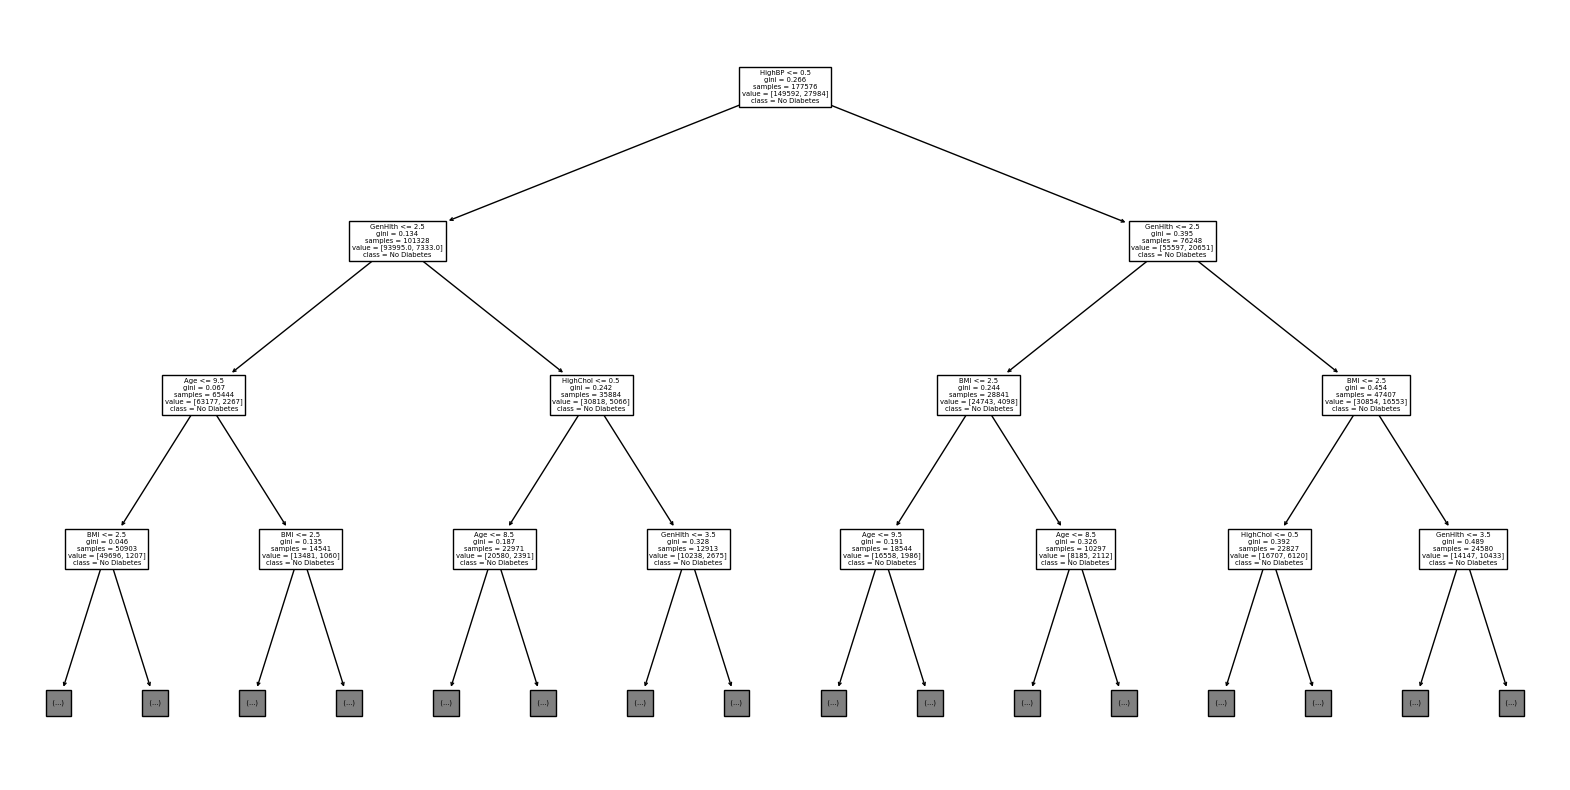

In [5]:
#TODO is three layers already too much?

import matplotlib.pyplot as plt
from sklearn import tree

# Visualize the tree of the model but only show the first three layers (max_depth=3)
plt.figure(figsize=(20, 10))
tree.plot_tree(
    decision_tree,
    feature_names=X_train.columns,
    class_names=["No Diabetes", "Diabetes"],
    max_depth=3 
)
plt.show()

In [6]:
# save model to pkl file for later reuse
import joblib
from datetime import datetime

# Get the current timestamp
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")

# Save the model to a file with a timestamp
model_filename = f'../models/decision_trees_ensembles/dt_model_initial{timestamp}.pkl'
joblib.dump(decision_tree, model_filename)

print(f"Model saved to '{model_filename}'")

Model saved to '../models/decision_trees_ensembles/dt_model_initial20241129_143239.pkl'


## Bagging

### Bagging (Example: Bagging with Decision Tree)

In [7]:
# Imports for the bagging classifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the base estimator
estimator = DecisionTreeClassifier(random_state=42)

# Initialize the Bagging classifier with the base estimator
bagging_decision_tree = BaggingClassifier(estimator=estimator, n_estimators=100, random_state=42)

# Train the model on the preprocessed training data
bagging_decision_tree.fit(X_train, y_train)

# Make predictions on the training set
y_train_pred = bagging_decision_tree.predict(X_train)

# Evaluate the model's performance on the training dataset
accuracy_train = accuracy_score(y_train, y_train_pred)

# Make predictions on the validation set
y_val_pred = bagging_decision_tree.predict(X_val)

# Evaluate the model's performance on the validation dataset
report = classification_report(y_val, y_val_pred, digits=4)

print("Training Accuracy", accuracy_train)
print("Classification Report:\n", report)

Training Accuracy 0.9829030950128396
Classification Report:
               precision    recall  f1-score   support

         0.0     0.8699    0.9360    0.9017     21797
         1.0     0.4241    0.2521    0.3162      4078

    accuracy                         0.8282     25875
   macro avg     0.6470    0.5940    0.6090     25875
weighted avg     0.7997    0.8282    0.8095     25875



In [8]:
# TODO => still overfitting

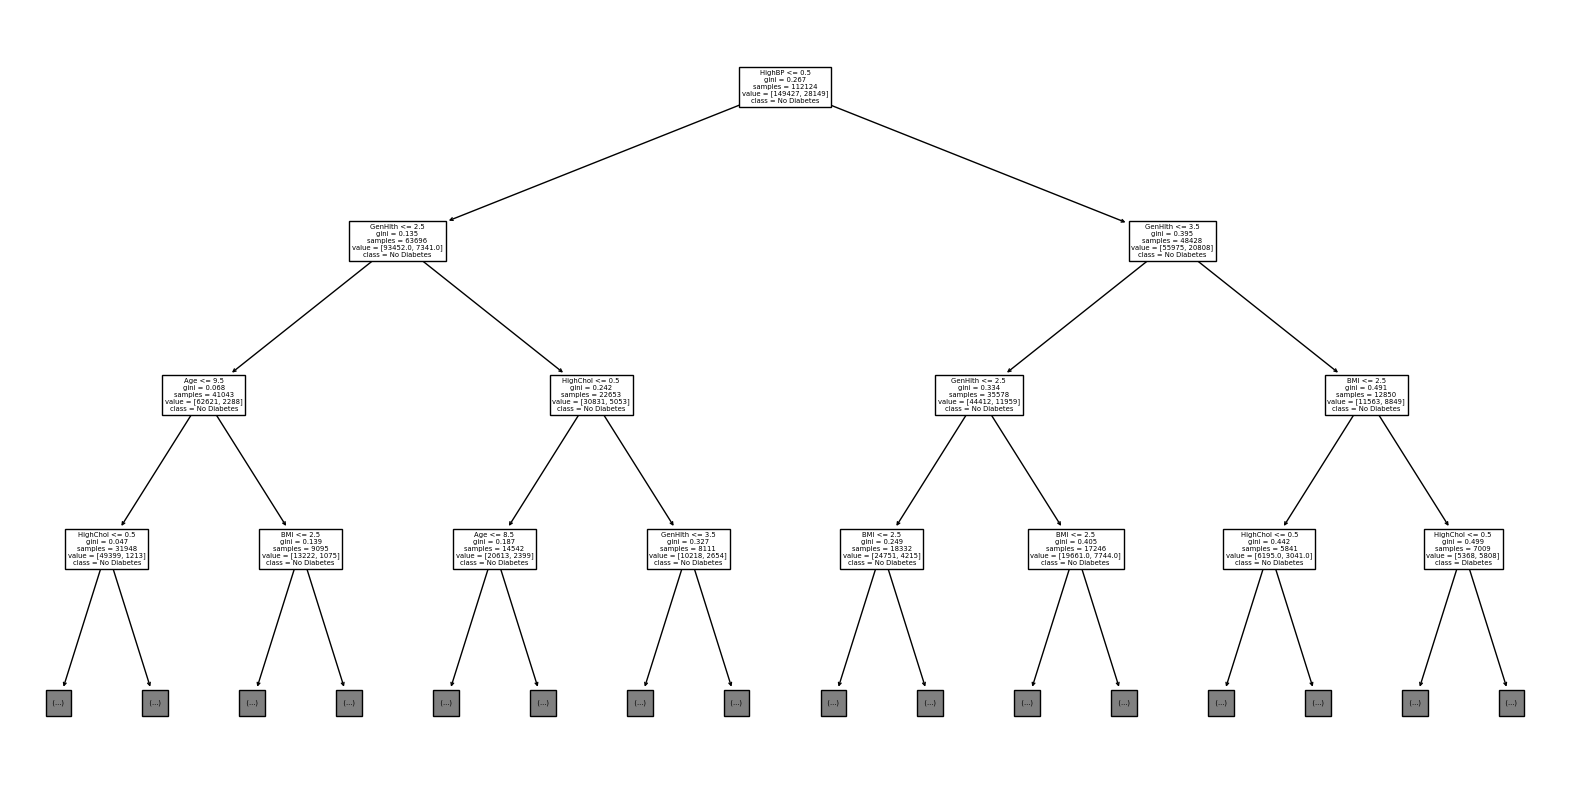

In [9]:
#TODO is three layers already too much?

import matplotlib.pyplot as plt
from sklearn import tree

# Visualize the first tree of the model but only show the first three layers (max_depth=3)
plt.figure(figsize=(20, 10))
tree.plot_tree(
    bagging_decision_tree.estimators_[0],
    feature_names=X_train.columns,
    class_names=["No Diabetes", "Diabetes"],
    max_depth=3 
)
plt.show()

In [10]:
# save model to pkl file for later reuse
import joblib
from datetime import datetime

# Get the current timestamp
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")

# Save the model to a file with a timestamp
model_filename = f'../models/decision_trees_ensembles/bdt_model_initial{timestamp}.pkl'
joblib.dump(bagging_decision_tree, model_filename)

print(f"Model saved to '{model_filename}'")

Model saved to '../models/decision_trees_ensembles/bdt_model_initial20241129_143304.pkl'


### Bagging (Example: Random Forest Classifier)

In [11]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

#TODO Adjust max_depth to? 
#TODO random_state = 0 soll üblich sein für reproducability, habe aber auch 42 gelesen als arbitrary number?
#TODO is it okay to set zero_division to 1?

# Initialize the random forest ensemble model with default parameters
bagging_random_forest = RandomForestClassifier(random_state=42)

# Train the model on the preprocessed training data
bagging_random_forest.fit(X_train, y_train)

# Make predictions on the training set
y_train_pred = bagging_random_forest.predict(X_train)

# Evaluate the model's performance on the training dataset
accuracy_train = accuracy_score(y_train, y_train_pred)

# Make predictions on the validation set
y_val_pred = bagging_random_forest.predict(X_val)

# Evaluate the model's performance on the validation dataset
report = classification_report(y_val, y_val_pred, digits=4)

print("Training Accuracy", accuracy_train)
print("Classification Report:\n", report)

Training Accuracy 0.9828974636212101
Classification Report:
               precision    recall  f1-score   support

         0.0     0.8667    0.9547    0.9086     21797
         1.0     0.4702    0.2151    0.2951      4078

    accuracy                         0.8381     25875
   macro avg     0.6685    0.5849    0.6018     25875
weighted avg     0.8042    0.8381    0.8119     25875



In [12]:
# TODO => still overfitting

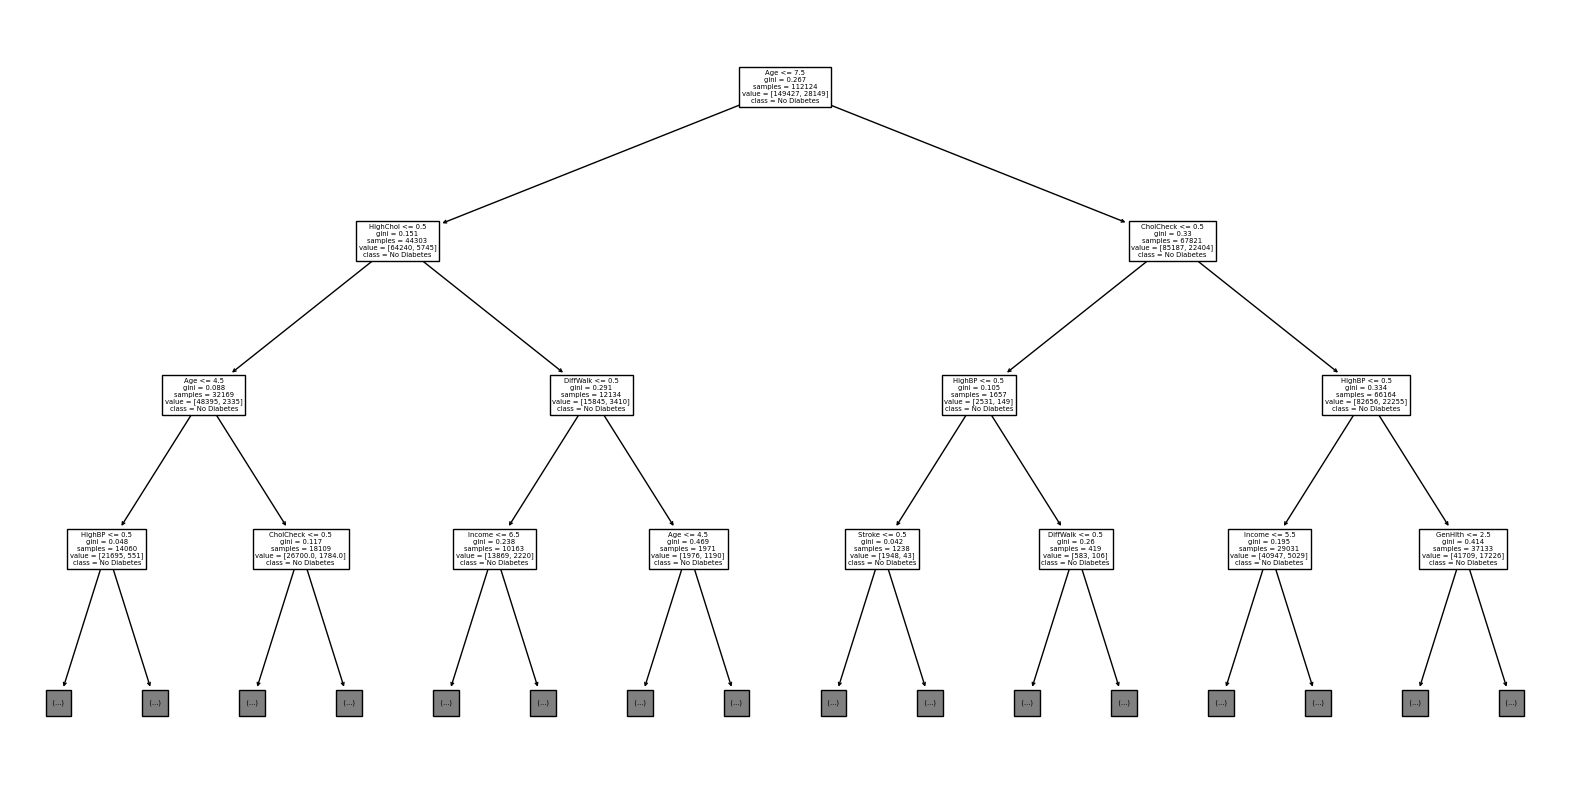

In [13]:
#TODO is three layers already too much?

import matplotlib.pyplot as plt
from sklearn import tree

# Visualize the first tree of the model but only show the first three layers (max_depth=3)
plt.figure(figsize=(20, 10))
tree.plot_tree(
    bagging_random_forest.estimators_[0],  
    feature_names=X_train.columns,
    class_names=["No Diabetes", "Diabetes"],
    max_depth=3 
)
plt.show()


In [14]:
# save model to pkl file for later reuse
import joblib
from datetime import datetime

# Get the current timestamp
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")

# Save the model to a file with a timestamp
model_filename = f'../models/decision_trees_ensembles/brf_model_initial{timestamp}.pkl'
joblib.dump(bagging_random_forest, model_filename)

print(f"Model saved to '{model_filename}'")

Model saved to '../models/decision_trees_ensembles/brf_model_initial20241129_143314.pkl'


## Boosting

### Boosting (Example: Adaptive Boosting)

In [15]:
from sklearn.ensemble import AdaBoostClassifier

# Initialize the AdaBoost ensemble model (with a decision tree as the default base classifier and other default parameters)
adaptive_boosting = AdaBoostClassifier(random_state=42)

# Train the model on the preprocessed training data
adaptive_boosting.fit(X_train, y_train)

# Make predictions on the training set
y_train_pred = adaptive_boosting.predict(X_train)

# Evaluate the model's performance on the training dataset
accuracy_train = accuracy_score(y_train, y_train_pred)

# Make predictions on the validation set
y_val_pred = adaptive_boosting.predict(X_val)

# Evaluate the model's performance on the validation dataset
report = classification_report(y_val, y_val_pred, digits=4)

print("Training Accuracy", accuracy_train)
print("Classification Report:\n", report)

Training Accuracy 0.848020002703068
Classification Report:
               precision    recall  f1-score   support

         0.0     0.8674    0.9672    0.9146     21797
         1.0     0.5442    0.2097    0.3027      4078

    accuracy                         0.8478     25875
   macro avg     0.7058    0.5884    0.6086     25875
weighted avg     0.8165    0.8478    0.8181     25875



In [16]:
# TODO => No overfitting, finally

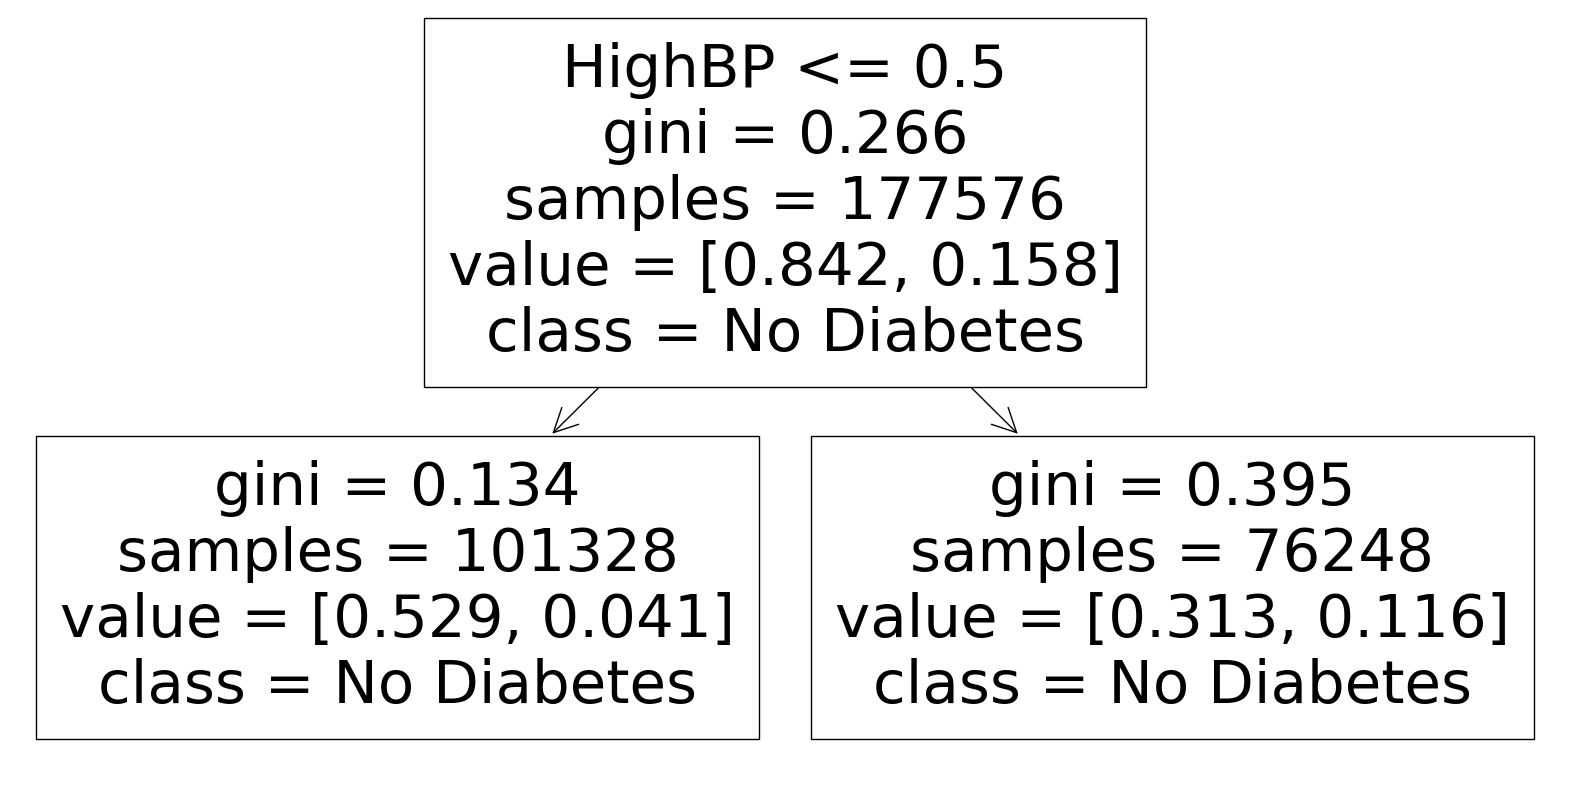

In [17]:
#TODO only one layer => decision stump

import matplotlib.pyplot as plt
from sklearn import tree

# Visualize the first tree of the model (with this model only one split and layer occurs)
plt.figure(figsize=(20, 10))
tree.plot_tree(
    adaptive_boosting.estimators_[0],  
    feature_names=X_train.columns,
    class_names=["No Diabetes", "Diabetes"],
)
plt.show()

In [18]:
# TODO => only one split, only one layer occurs (this is called "Stump")

In [19]:
# save model to pkl file for later reuse
import joblib
from datetime import datetime

# Get the current timestamp
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")

# Save the model to a file with a timestamp
model_filename = f'../models/decision_trees_ensembles/adab_model_initial{timestamp}.pkl'
joblib.dump(adaptive_boosting, model_filename)

print(f"Model saved to '{model_filename}'")

Model saved to '../models/decision_trees_ensembles/adab_model_initial20241129_143317.pkl'


### Boosting (Example: Extreme Gradient Boosting)


In [20]:
from xgboost import XGBClassifier

# Initialize the XGBoost ensemble model (with a decision tree as the default base classifier and other default parameters)
extreme_gradient_boosting = XGBClassifier(random_state=42)

# Train the model on the preprocessed training data
extreme_gradient_boosting.fit(X_train, y_train)

# Make predictions on the training set
y_train_pred = extreme_gradient_boosting.predict(X_train)

# Evaluate the model's performance on the training dataset
accuracy_train = accuracy_score(y_train, y_train_pred)

# Make predictions on the validation set
y_val_pred = extreme_gradient_boosting.predict(X_val)

# Evaluate the model's performance on the validation dataset
report = classification_report(y_val, y_val_pred, digits=4)

print("Training Accuracy", accuracy_train)
print("Classification Report:\n", report)

Training Accuracy 0.8608595756183268
Classification Report:
               precision    recall  f1-score   support

         0.0     0.8663    0.9696    0.9151     21797
         1.0     0.5520    0.2003    0.2940      4078

    accuracy                         0.8483     25875
   macro avg     0.7092    0.5850    0.6045     25875
weighted avg     0.8168    0.8483    0.8172     25875



In [21]:
# TODO => No overfitting, finally

<Figure size 30000x15000 with 0 Axes>

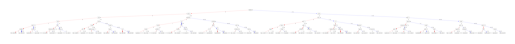

In [22]:
import matplotlib.pyplot as plt
from xgboost import plot_tree
import xgboost as xgb


# Visualize the first tree of the model
plt.figure(figsize=(300, 150))  
plot_tree(extreme_gradient_boosting)
plt.show()

In [23]:
#TODO => is not from the sklearn library, but from the xgboost library
# therefore need to find different way to visualize the tree

In [24]:
# save model to pkl file for later reuse
import joblib
from datetime import datetime

# Get the current timestamp
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")

# Save the model to a file with a timestamp
model_filename = f'../models/decision_trees_ensembles/xgb_model_initial{timestamp}.pkl'
joblib.dump(extreme_gradient_boosting, model_filename)

print(f"Model saved to '{model_filename}'")

Model saved to '../models/decision_trees_ensembles/xgb_model_initial20241129_143318.pkl'


### Random Undersampling

In [25]:
# test random undersampling
X_train_undersampling_random, y_train_undersampling_random = data_loader.training_data_undersampling_random
X_val, y_val = data_loader.validation_data
X_test, y_test = data_loader.test_data

print(f"X_train_undersampling_random shape: {X_train_undersampling_random.shape}")
print(f"y_train_undersampling_random shape: {y_train_undersampling_random.shape}")
print(f"X_val shape: {X_val.shape}")
print(f"y_val shape: {y_val.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train_undersampling_random shape: (55968, 21)
y_train_undersampling_random shape: (55968,)
X_val shape: (25875, 21)
y_val shape: (25875,)
X_test shape: (50229, 21)
y_test shape: (50229,)


In [26]:
# Imports for the decision tree model
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the decision tree model with default parameters
decision_tree_undersampling_random = DecisionTreeClassifier(random_state=42)

# Train the model on the preprocessed training data
decision_tree_undersampling_random.fit(X_train_undersampling_random, y_train_undersampling_random)

# Make predictions on the training set
y_train_pred_undersampling_random = decision_tree_undersampling_random.predict(X_train_undersampling_random)

# Evaluate the model's performance on the training dataset
accuracy_train_undersampling_random = accuracy_score(y_train_undersampling_random, y_train_pred_undersampling_random)

# Make predictions on the validation set
y_val_pred = decision_tree_undersampling_random.predict(X_val)

# Evaluate the model's performance on the validation dataset
report = classification_report(y_val, y_val_pred, digits=4)

print("Training Accuracy", accuracy_train_undersampling_random)
print("Classification Report:\n", report)

Training Accuracy 0.9813464837049742
Classification Report:
               precision    recall  f1-score   support

         0.0     0.9065    0.6665    0.7682     21797
         1.0     0.2619    0.6327    0.3705      4078

    accuracy                         0.6611     25875
   macro avg     0.5842    0.6496    0.5693     25875
weighted avg     0.8049    0.6611    0.7055     25875



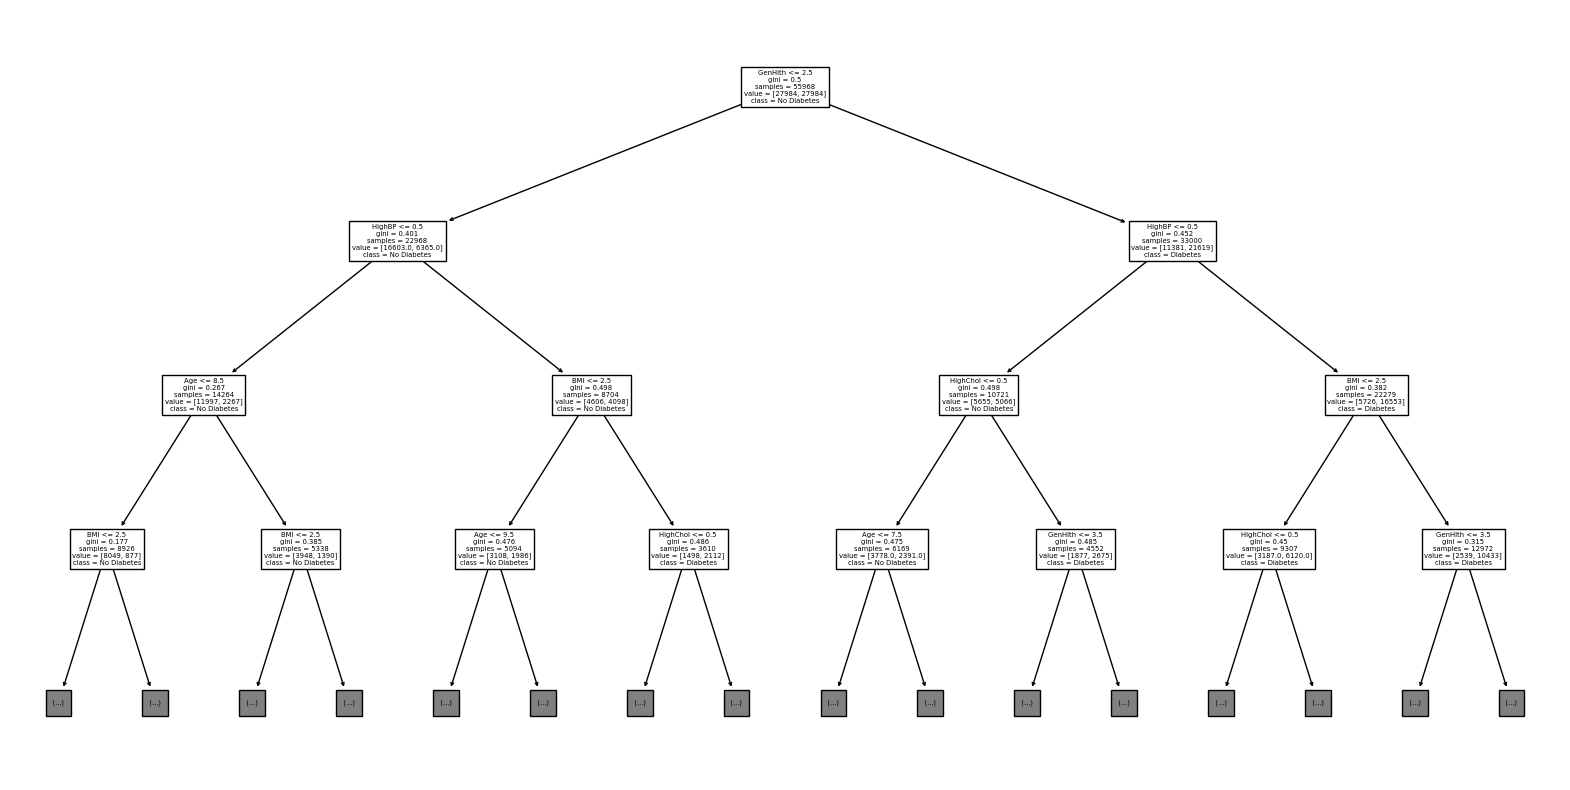

In [27]:
#TODO is three layers already too much?

import matplotlib.pyplot as plt
from sklearn import tree

# Visualize the tree of the model but only show the first three layers (max_depth=3)
plt.figure(figsize=(20, 10))
tree.plot_tree(
    decision_tree_undersampling_random,
    feature_names=X_train_undersampling_random.columns,
    class_names=["No Diabetes", "Diabetes"],
    max_depth=3 
)
plt.show()

In [28]:
# save model to pkl file for later reuse
import joblib
from datetime import datetime

# Get the current timestamp
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")

# Save the model to a file with a timestamp
model_filename = f'../models/decision_trees_ensembles/dt_model_undersampling_random{timestamp}.pkl'
joblib.dump(decision_tree_undersampling_random, model_filename)

print(f"Model saved to '{model_filename}'")

Model saved to '../models/decision_trees_ensembles/dt_model_undersampling_random20241129_143319.pkl'


In [29]:
# Imports for the bagging classifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the base estimator
estimator = DecisionTreeClassifier(random_state=42)

# Initialize the Bagging classifier with the base estimator
bagging_decision_tree_undersampling_random = BaggingClassifier(estimator=estimator, n_estimators=100, random_state=42)

# Train the model on the preprocessed training data
bagging_decision_tree_undersampling_random.fit(X_train_undersampling_random, y_train_undersampling_random)

# Make predictions on the training set
y_train_pred_undersampling_random = bagging_decision_tree_undersampling_random.predict(X_train_undersampling_random)

# Evaluate the model's performance on the training dataset
accuracy_train_undersampling_random = accuracy_score(y_train_undersampling_random, y_train_pred_undersampling_random)

# Make predictions on the validation set
y_val_pred = bagging_decision_tree_undersampling_random.predict(X_val)

# Evaluate the model's performance on the validation dataset
report = classification_report(y_val, y_val_pred, digits=4)

print("Training Accuracy", accuracy_train_undersampling_random)
print("Classification Report:\n", report)

Training Accuracy 0.9813286163522013
Classification Report:
               precision    recall  f1-score   support

         0.0     0.9320    0.6827    0.7881     21797
         1.0     0.3020    0.7339    0.4280      4078

    accuracy                         0.6908     25875
   macro avg     0.6170    0.7083    0.6080     25875
weighted avg     0.8328    0.6908    0.7314     25875



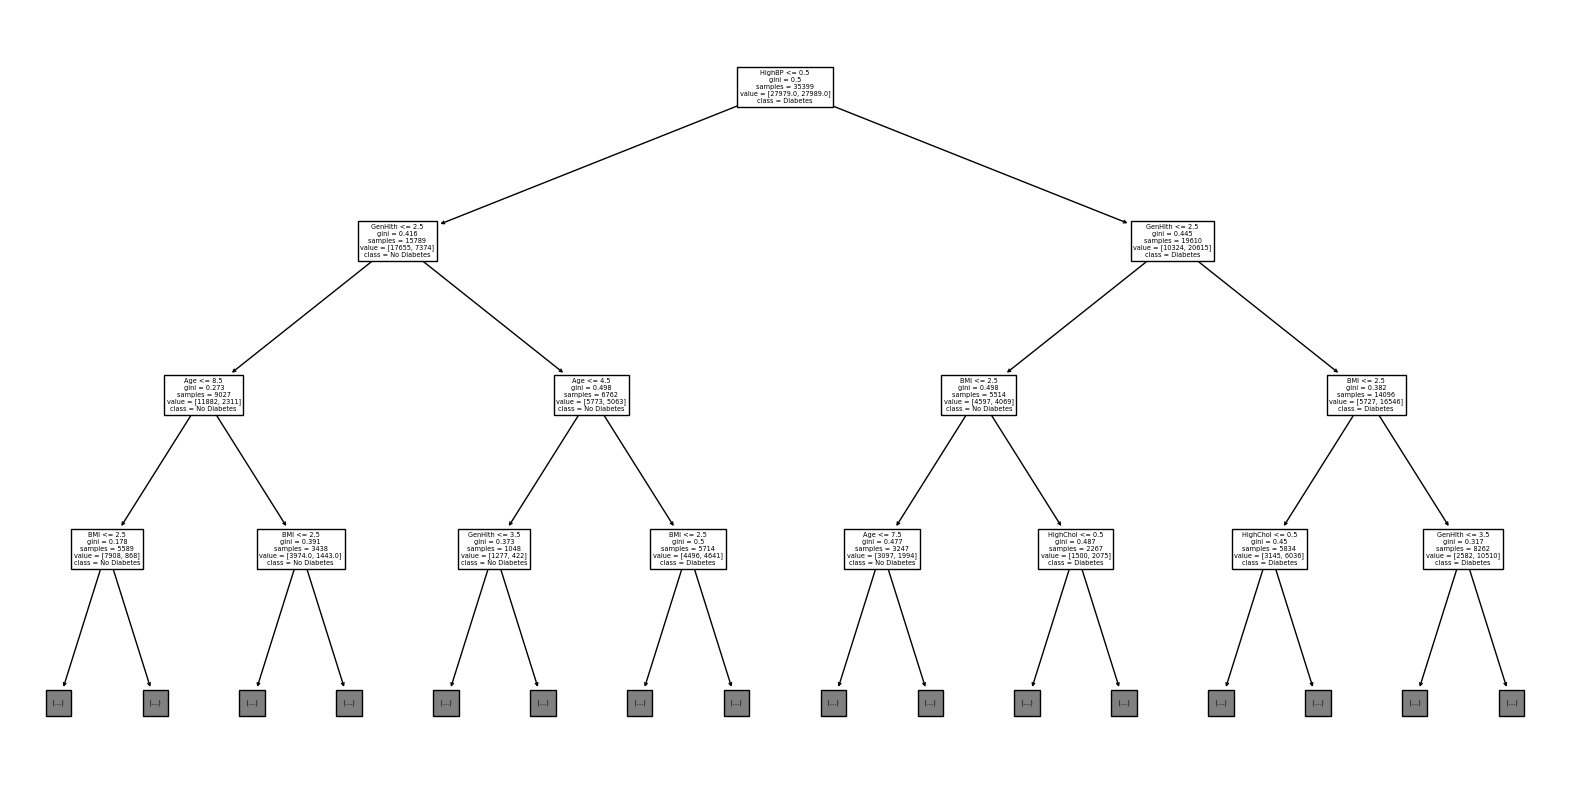

In [30]:
 #TODO is three layers already too much?

import matplotlib.pyplot as plt
from sklearn import tree

# Visualize the first tree of the model but only show the first three layers (max_depth=3)
plt.figure(figsize=(20, 10))
tree.plot_tree(
    bagging_decision_tree_undersampling_random.estimators_[0],
    feature_names=X_train_undersampling_random.columns,
    class_names=["No Diabetes", "Diabetes"],
    max_depth=3 
)
plt.show()

In [31]:
# save model to pkl file for later reuse
import joblib
from datetime import datetime

# Get the current timestamp
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")

# Save the model to a file with a timestamp
model_filename = f'../models/decision_trees_ensembles/bdt_model_undersampling_random{timestamp}.pkl'
joblib.dump(bagging_decision_tree_undersampling_random, model_filename)

print(f"Model saved to '{model_filename}'")

Model saved to '../models/decision_trees_ensembles/bdt_model_undersampling_random20241129_143328.pkl'


In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

#TODO Adjust max_depth to? 
#TODO random_state = 0 soll üblich sein für reproducability, habe aber auch 42 gelesen als arbitrary number?
#TODO is it okay to set zero_division to 1?

# Initialize the random forest ensemble model with default parameters
bagging_random_forest_undersampling_random = RandomForestClassifier(random_state=42)

# Train the model on the preprocessed training data
bagging_random_forest_undersampling_random.fit(X_train, y_train)

# Make predictions on the training set
y_train_pred = bagging_random_forest_undersampling_random.predict(X_train)

# Evaluate the model's performance on the training dataset
accuracy_train_undersampling_random = accuracy_score(y_train, y_train_pred)

# Make predictions on the validation set
y_val_pred = bagging_random_forest_undersampling_random.predict(X_val)

# Evaluate the model's performance on the validation dataset
report = classification_report(y_val, y_val_pred, digits=4)

print("Training Accuracy", accuracy_train_undersampling_random)
print("Classification Report:\n", report)

Training Accuracy 0.9828974636212101
Classification Report:
               precision    recall  f1-score   support

         0.0     0.8667    0.9547    0.9086     21797
         1.0     0.4702    0.2151    0.2951      4078

    accuracy                         0.8381     25875
   macro avg     0.6685    0.5849    0.6018     25875
weighted avg     0.8042    0.8381    0.8119     25875



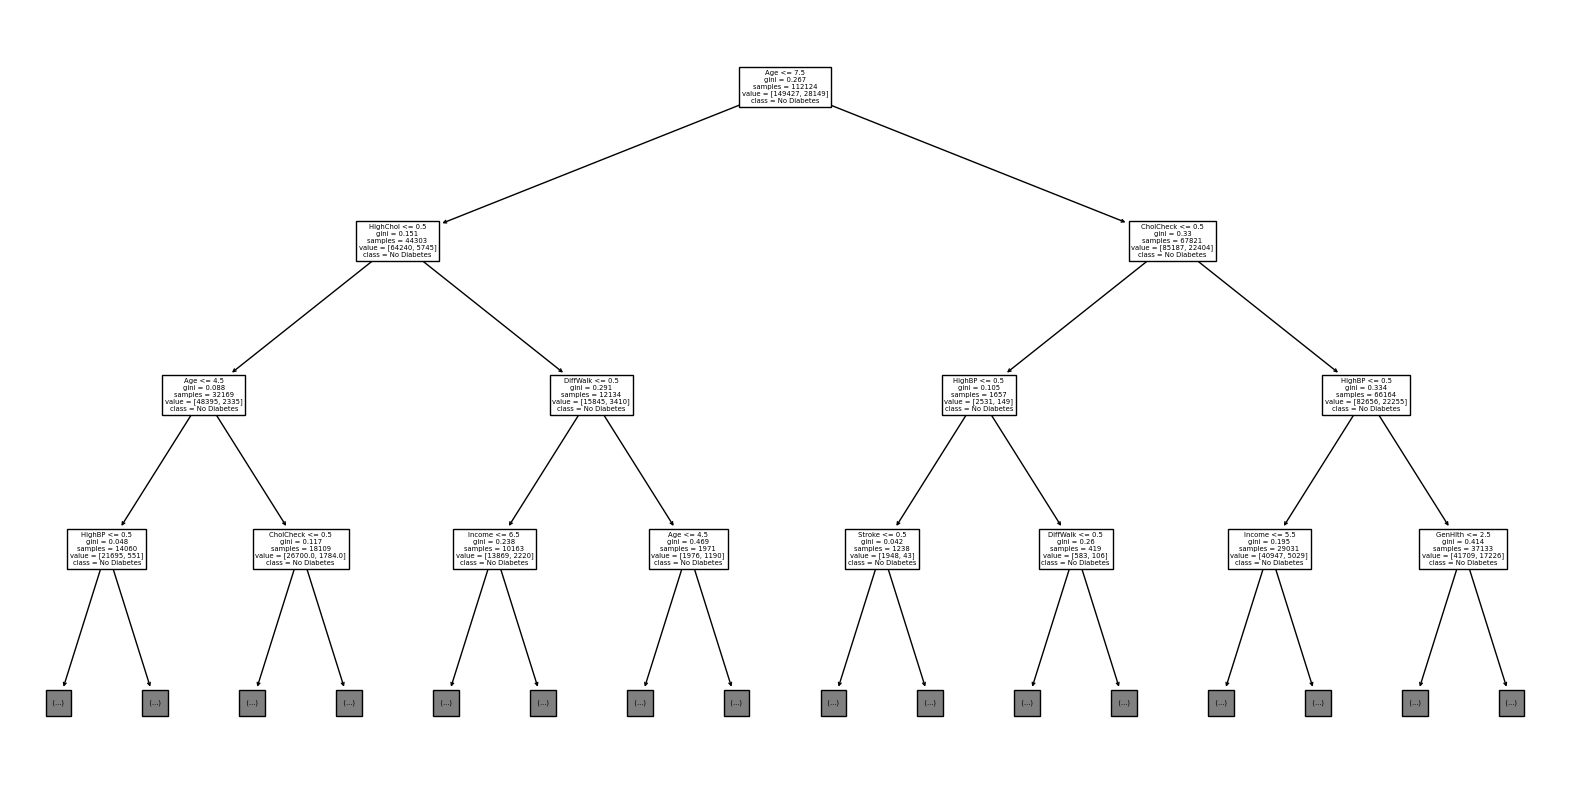

In [50]:
#TODO only one layer => decision stump

import matplotlib.pyplot as plt
from sklearn import tree

# Visualize the first tree of the model (with this model only one split and layer occurs)
plt.figure(figsize=(20, 10))
tree.plot_tree(
    bagging_random_forest_undersampling_random.estimators_[0],  
    feature_names=X_train_undersampling_random.columns,
    class_names=["No Diabetes", "Diabetes"],
    max_depth=3 
)
plt.show()

In [34]:
# save model to pkl file for later reuse
import joblib
from datetime import datetime

# Get the current timestamp
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")

# Save the model to a file with a timestamp
model_filename = f'../models/decision_trees_ensembles/brf_model_undersampling_random{timestamp}.pkl'
joblib.dump(bagging_random_forest_undersampling_random, model_filename)

print(f"Model saved to '{model_filename}'")

Model saved to '../models/decision_trees_ensembles/brf_model_undersampling_random20241129_144046.pkl'


In [35]:
from sklearn.ensemble import AdaBoostClassifier

# Initialize the AdaBoost ensemble model (with a decision tree as the default base classifier and other default parameters)
adaptive_boosting_undersampling_random = AdaBoostClassifier(random_state=42)

# Train the model on the preprocessed training data
adaptive_boosting_undersampling_random.fit(X_train_undersampling_random, y_train_undersampling_random)

# Make predictions on the training set
y_train_pred_undersampling_random = adaptive_boosting_undersampling_random.predict(X_train_undersampling_random)

# Evaluate the model's performance on the training dataset
accuracy_train_undersampling_random = accuracy_score(y_train_undersampling_random, y_train_pred_undersampling_random)

# Make predictions on the validation set
y_val_pred = adaptive_boosting_undersampling_random.predict(X_val)

# Evaluate the model's performance on the validation dataset
report = classification_report(y_val, y_val_pred, digits=4)

print("Training Accuracy", accuracy_train_undersampling_random)
print("Classification Report:\n", report)

Training Accuracy 0.744550457404231
Classification Report:
               precision    recall  f1-score   support

         0.0     0.9420    0.7164    0.8138     21797
         1.0     0.3351    0.7641    0.4659      4078

    accuracy                         0.7239     25875
   macro avg     0.6385    0.7402    0.6399     25875
weighted avg     0.8463    0.7239    0.7590     25875



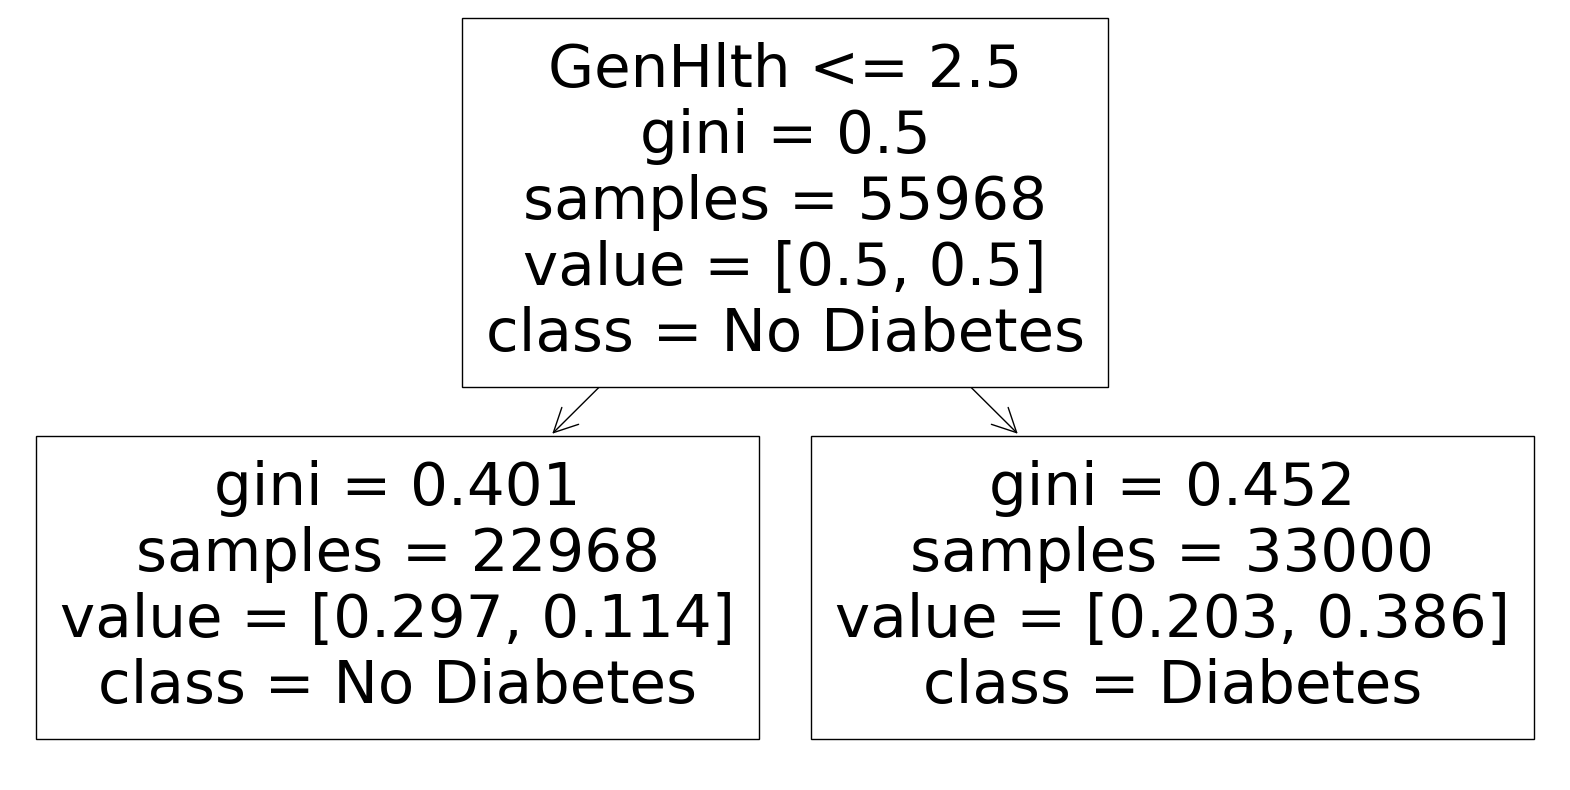

In [36]:
#TODO only one layer => decision stump

import matplotlib.pyplot as plt
from sklearn import tree

# Visualize the first tree of the model (with this model only one split and layer occurs)
plt.figure(figsize=(20, 10))
tree.plot_tree(
    adaptive_boosting_undersampling_random.estimators_[0],  
    feature_names=X_train_undersampling_random.columns,
    class_names=["No Diabetes", "Diabetes"],
)
plt.show()

In [37]:
# save model to pkl file for later reuse
import joblib
from datetime import datetime

# Get the current timestamp
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")

# Save the model to a file with a timestamp
model_filename = f'../models/decision_trees_ensembles/adab_model_undersampling_random{timestamp}.pkl'
joblib.dump(adaptive_boosting_undersampling_random, model_filename)

print(f"Model saved to '{model_filename}'")

Model saved to '../models/decision_trees_ensembles/adab_model_undersampling_random20241129_144047.pkl'


In [38]:
from xgboost import XGBClassifier

# Initialize the XGBoost ensemble model (with a decision tree as the default base classifier and other default parameters)
extreme_gradient_boosting_undersampling_random = XGBClassifier(random_state=42)

# Train the model on the preprocessed training data
extreme_gradient_boosting_undersampling_random.fit(X_train_undersampling_random, y_train_undersampling_random)

# Make predictions on the training set
y_train_pred_undersampling_random = extreme_gradient_boosting_undersampling_random.predict(X_train_undersampling_random)

# Evaluate the model's performance on the training dataset
accuracy_train_undersampling_random = accuracy_score(y_train_undersampling_random, y_train_pred_undersampling_random)

# Make predictions on the validation set
y_val_pred = extreme_gradient_boosting_undersampling_random.predict(X_val)

# Evaluate the model's performance on the validation dataset
report = classification_report(y_val, y_val_pred, digits=4)

print("Training Accuracy", accuracy_train_undersampling_random)
print("Classification Report:\n", report)

Training Accuracy 0.7850914808461978
Classification Report:
               precision    recall  f1-score   support

         0.0     0.9443    0.6943    0.8002     21797
         1.0     0.3234    0.7810    0.4574      4078

    accuracy                         0.7080     25875
   macro avg     0.6338    0.7377    0.6288     25875
weighted avg     0.8464    0.7080    0.7462     25875



<Figure size 30000x15000 with 0 Axes>

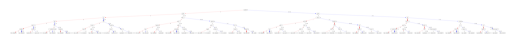

In [39]:
import matplotlib.pyplot as plt
from xgboost import plot_tree
import xgboost as xgb


# Visualize the first tree of the model
plt.figure(figsize=(300, 150))  
plot_tree(extreme_gradient_boosting_undersampling_random)
plt.show()

In [40]:
# save model to pkl file for later reuse
import joblib
from datetime import datetime

# Get the current timestamp
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")

# Save the model to a file with a timestamp
model_filename = f'../models/decision_trees_ensembles/xgb_model_undersampling_random{timestamp}.pkl'
joblib.dump(extreme_gradient_boosting_undersampling_random, model_filename)

print(f"Model saved to '{model_filename}'")

Model saved to '../models/decision_trees_ensembles/xgb_model_undersampling_random20241129_144049.pkl'


### Random Oversampling

In [41]:
# test random oversampling
X_train_oversampling_random, y_train_oversampling_random = data_loader.training_data_oversampling_random
X_val, y_val = data_loader.validation_data
X_test, y_test = data_loader.test_data

print(f"X_train_oversampling_random shape: {X_train_oversampling_random.shape}")
print(f"y_train_oversampling_random shape: {y_train_oversampling_random.shape}")
print(f"X_val shape: {X_val.shape}")
print(f"y_val shape: {y_val.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train_oversampling_random shape: (299184, 21)
y_train_oversampling_random shape: (299184,)
X_val shape: (25875, 21)
y_val shape: (25875,)
X_test shape: (50229, 21)
y_test shape: (50229,)


In [42]:
# Imports for the decision tree model
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the decision tree model with default parameters
decision_tree_oversampling_random = DecisionTreeClassifier(random_state=42)

# Train the model on the preprocessed training data
decision_tree_oversampling_random.fit(X_train_oversampling_random, y_train_oversampling_random)

# Make predictions on the training set
y_train_pred_oversampling_random = decision_tree_oversampling_random.predict(X_train_oversampling_random)

# Evaluate the model's performance on the training dataset
accuracy_train_oversampling_random = accuracy_score(y_train_oversampling_random, y_train_pred_oversampling_random)

# Make predictions on the validation set
y_val_pred = decision_tree_oversampling_random.predict(X_val)

# Evaluate the model's performance on the validation dataset
report = classification_report(y_val, y_val_pred, digits=4)

print("Training Accuracy", accuracy_train_oversampling_random)
print("Classification Report:\n", report)

Training Accuracy 0.9797215091716135
Classification Report:
               precision    recall  f1-score   support

         0.0     0.8716    0.8510    0.8612     21797
         1.0     0.2931    0.3301    0.3105      4078

    accuracy                         0.7689     25875
   macro avg     0.5823    0.5905    0.5858     25875
weighted avg     0.7804    0.7689    0.7744     25875



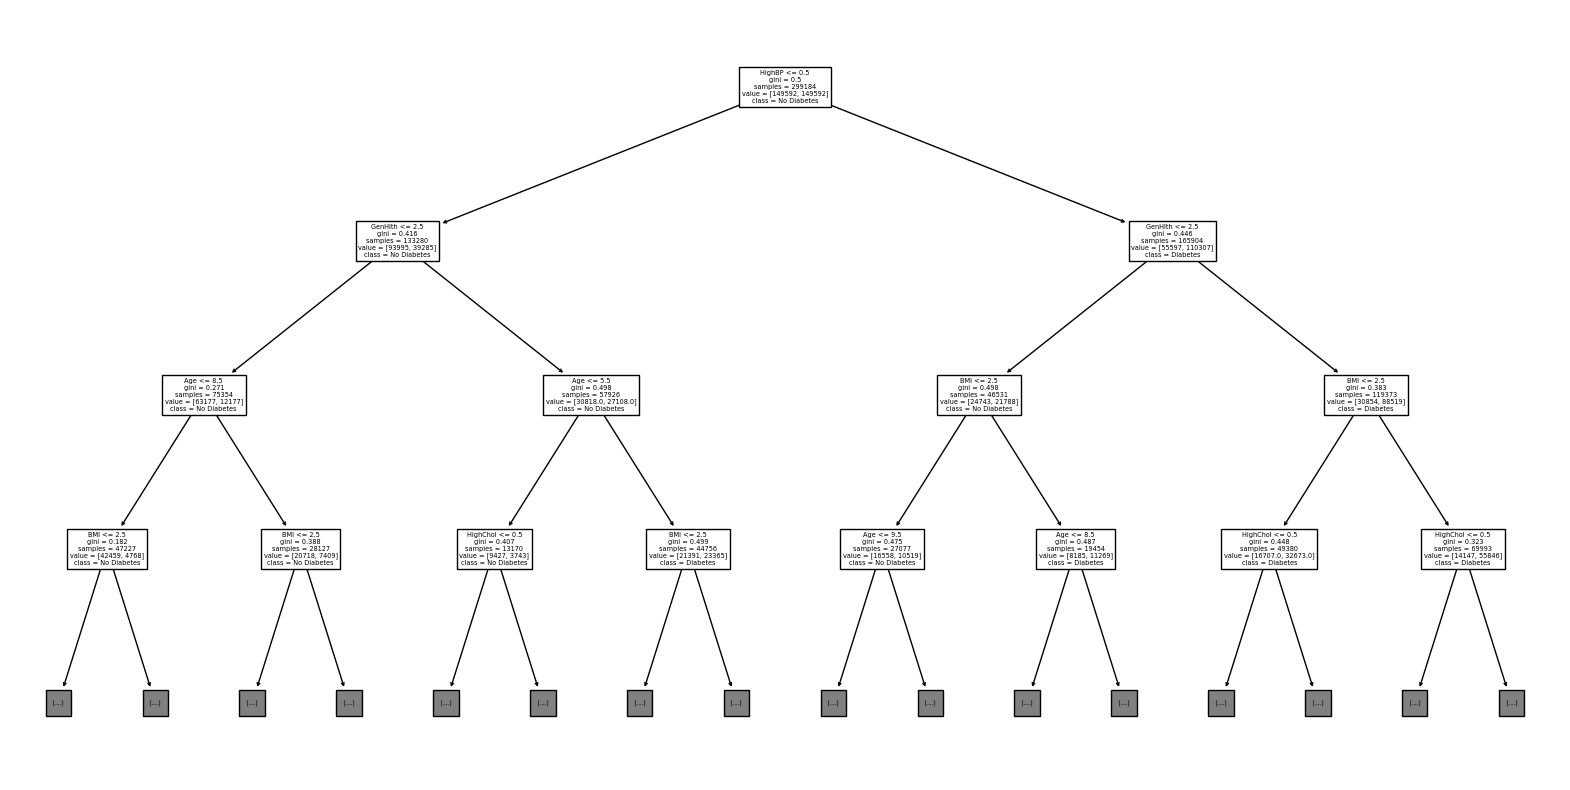

In [43]:
#TODO is three layers already too much?

import matplotlib.pyplot as plt
from sklearn import tree

# Visualize the tree of the model but only show the first three layers (max_depth=3)
plt.figure(figsize=(20, 10))
tree.plot_tree(
    decision_tree_oversampling_random,
    feature_names=X_train_oversampling_random.columns,
    class_names=["No Diabetes", "Diabetes"],
    max_depth=3 
)
plt.show()

In [44]:
# save model to pkl file for later reuse
import joblib
from datetime import datetime

# Get the current timestamp
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")

# Save the model to a file with a timestamp
model_filename = f'../models/decision_trees_ensembles/dt_model_oversampling_random{timestamp}.pkl'
joblib.dump(decision_tree_oversampling_random, model_filename)

print(f"Model saved to '{model_filename}'")

Model saved to '../models/decision_trees_ensembles/dt_model_oversampling_random20241129_144050.pkl'


In [45]:
# Imports for the bagging classifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the base estimator
estimator = DecisionTreeClassifier(random_state=42)

# Initialize the Bagging classifier with the base estimator
bagging_decision_tree_oversampling_random = BaggingClassifier(estimator=estimator, n_estimators=100, random_state=42)

# Train the model on the preprocessed training data
bagging_decision_tree_oversampling_random.fit(X_train_oversampling_random, y_train_oversampling_random)

# Make predictions on the training set
y_train_pred_oversampling_random = bagging_decision_tree_oversampling_random.predict(X_train_oversampling_random)

# Evaluate the model's performance on the training dataset
accuracy_train_oversampling_random = accuracy_score(y_train_oversampling_random, y_train_pred_oversampling_random)

# Make predictions on the validation set
y_val_pred = bagging_decision_tree_oversampling_random.predict(X_val)

# Evaluate the model's performance on the validation dataset
report = classification_report(y_val, y_val_pred, digits=4)

print("Training Accuracy", accuracy_train_oversampling_random)
print("Classification Report:\n", report)

Training Accuracy 0.9797215091716135
Classification Report:
               precision    recall  f1-score   support

         0.0     0.8815    0.8757    0.8786     21797
         1.0     0.3581    0.3708    0.3643      4078

    accuracy                         0.7961     25875
   macro avg     0.6198    0.6232    0.6215     25875
weighted avg     0.7990    0.7961    0.7975     25875



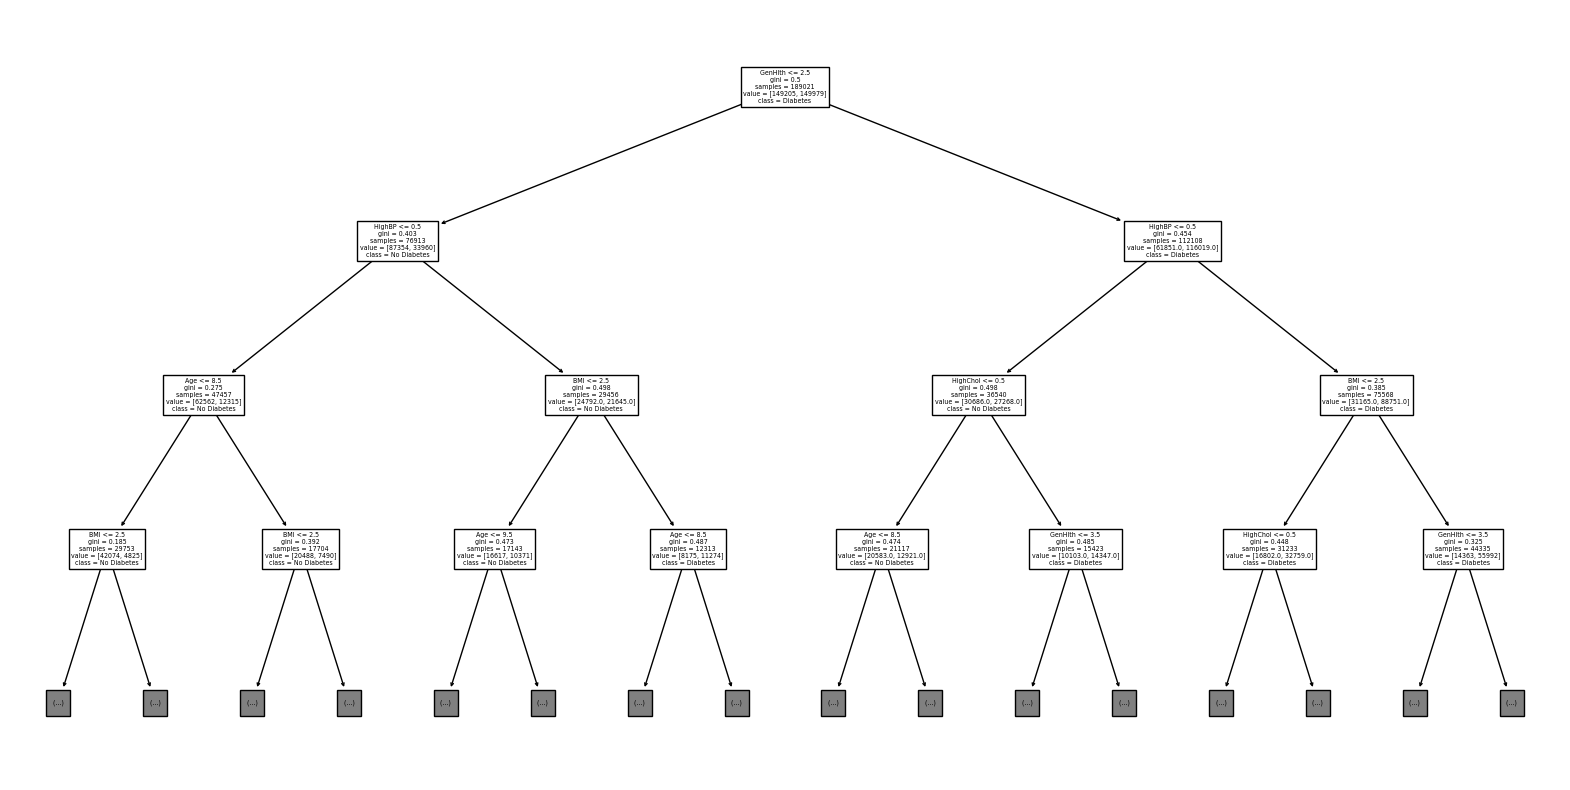

In [46]:
 #TODO is three layers already too much?

import matplotlib.pyplot as plt
from sklearn import tree

# Visualize the first tree of the model but only show the first three layers (max_depth=3)
plt.figure(figsize=(20, 10))
tree.plot_tree(
    bagging_decision_tree_oversampling_random.estimators_[0],
    feature_names=X_train_oversampling_random.columns,
    class_names=["No Diabetes", "Diabetes"],
    max_depth=3 
)
plt.show()

In [47]:
# save model to pkl file for later reuse
import joblib
from datetime import datetime

# Get the current timestamp
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")

# Save the model to a file with a timestamp
model_filename = f'../models/decision_trees_ensembles/bdt_model_oversampling_random{timestamp}.pkl'
joblib.dump(bagging_decision_tree_oversampling_random, model_filename)

print(f"Model saved to '{model_filename}'")

Model saved to '../models/decision_trees_ensembles/bdt_model_oversampling_random20241129_144139.pkl'


In [48]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

#TODO Adjust max_depth to? 
#TODO random_state = 0 soll üblich sein für reproducability, habe aber auch 42 gelesen als arbitrary number?
#TODO is it okay to set zero_division to 1?

# Initialize the random forest ensemble model with default parameters
bagging_random_forest_oversampling_random = RandomForestClassifier(random_state=42)

# Train the model on the preprocessed training data
bagging_random_forest_oversampling_random.fit(X_train, y_train)

# Make predictions on the training set
y_train_pred = bagging_random_forest_oversampling_random.predict(X_train)

# Evaluate the model's performance on the training dataset
accuracy_train_oversampling_random = accuracy_score(y_train, y_train_pred)

# Make predictions on the validation set
y_val_pred = bagging_random_forest_oversampling_random.predict(X_val)

# Evaluate the model's performance on the validation dataset
report = classification_report(y_val, y_val_pred, digits=4)

print("Training Accuracy", accuracy_train_oversampling_random)
print("Classification Report:\n", report)

Training Accuracy 0.9828974636212101
Classification Report:
               precision    recall  f1-score   support

         0.0     0.8667    0.9547    0.9086     21797
         1.0     0.4702    0.2151    0.2951      4078

    accuracy                         0.8381     25875
   macro avg     0.6685    0.5849    0.6018     25875
weighted avg     0.8042    0.8381    0.8119     25875



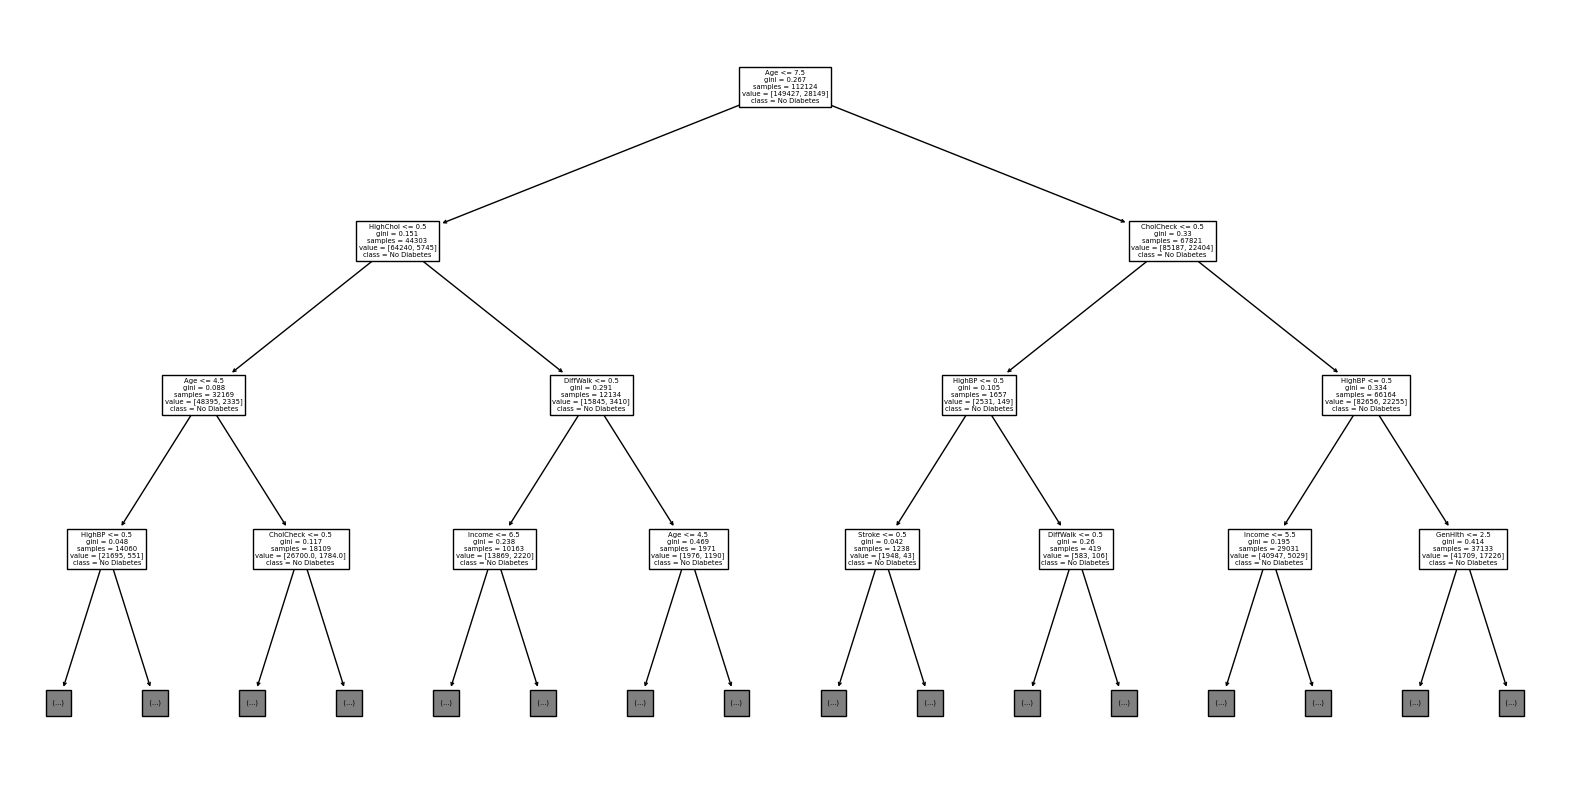

In [51]:
#TODO only one layer => decision stump

import matplotlib.pyplot as plt
from sklearn import tree

# Visualize the first tree of the model 
plt.figure(figsize=(20, 10))
tree.plot_tree(
    bagging_random_forest_oversampling_random.estimators_[0],  
    feature_names=X_train_oversampling_random.columns,
    class_names=["No Diabetes", "Diabetes"],
    max_depth=3 
)
plt.show()

In [52]:
# save model to pkl file for later reuse
import joblib
from datetime import datetime

# Get the current timestamp
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")

# Save the model to a file with a timestamp
model_filename = f'../models/decision_trees_ensembles/brf_model_oversampling_random{timestamp}.pkl'
joblib.dump(bagging_random_forest_oversampling_random, model_filename)

print(f"Model saved to '{model_filename}'")

Model saved to '../models/decision_trees_ensembles/brf_model_oversampling_random20241129_144403.pkl'


In [53]:
from sklearn.ensemble import AdaBoostClassifier

# Initialize the AdaBoost ensemble model (with a decision tree as the default base classifier and other default parameters)
adaptive_boosting_oversampling_random = AdaBoostClassifier(random_state=42)

# Train the model on the preprocessed training data
adaptive_boosting_oversampling_random.fit(X_train_oversampling_random, y_train_oversampling_random)

# Make predictions on the training set
y_train_pred_oversampling_random = adaptive_boosting_oversampling_random.predict(X_train_oversampling_random)

# Evaluate the model's performance on the training dataset
accuracy_train_oversampling_random = accuracy_score(y_train_oversampling_random, y_train_pred_oversampling_random)

# Make predictions on the validation set
y_val_pred = adaptive_boosting_oversampling_random.predict(X_val)

# Evaluate the model's performance on the validation dataset
report = classification_report(y_val, y_val_pred, digits=4)

print("Training Accuracy", accuracy_train_oversampling_random)
print("Classification Report:\n", report)

Training Accuracy 0.7427469383389486
Classification Report:
               precision    recall  f1-score   support

         0.0     0.9422    0.7195    0.8160     21797
         1.0     0.3376    0.7641    0.4683      4078

    accuracy                         0.7266     25875
   macro avg     0.6399    0.7418    0.6421     25875
weighted avg     0.8469    0.7266    0.7612     25875



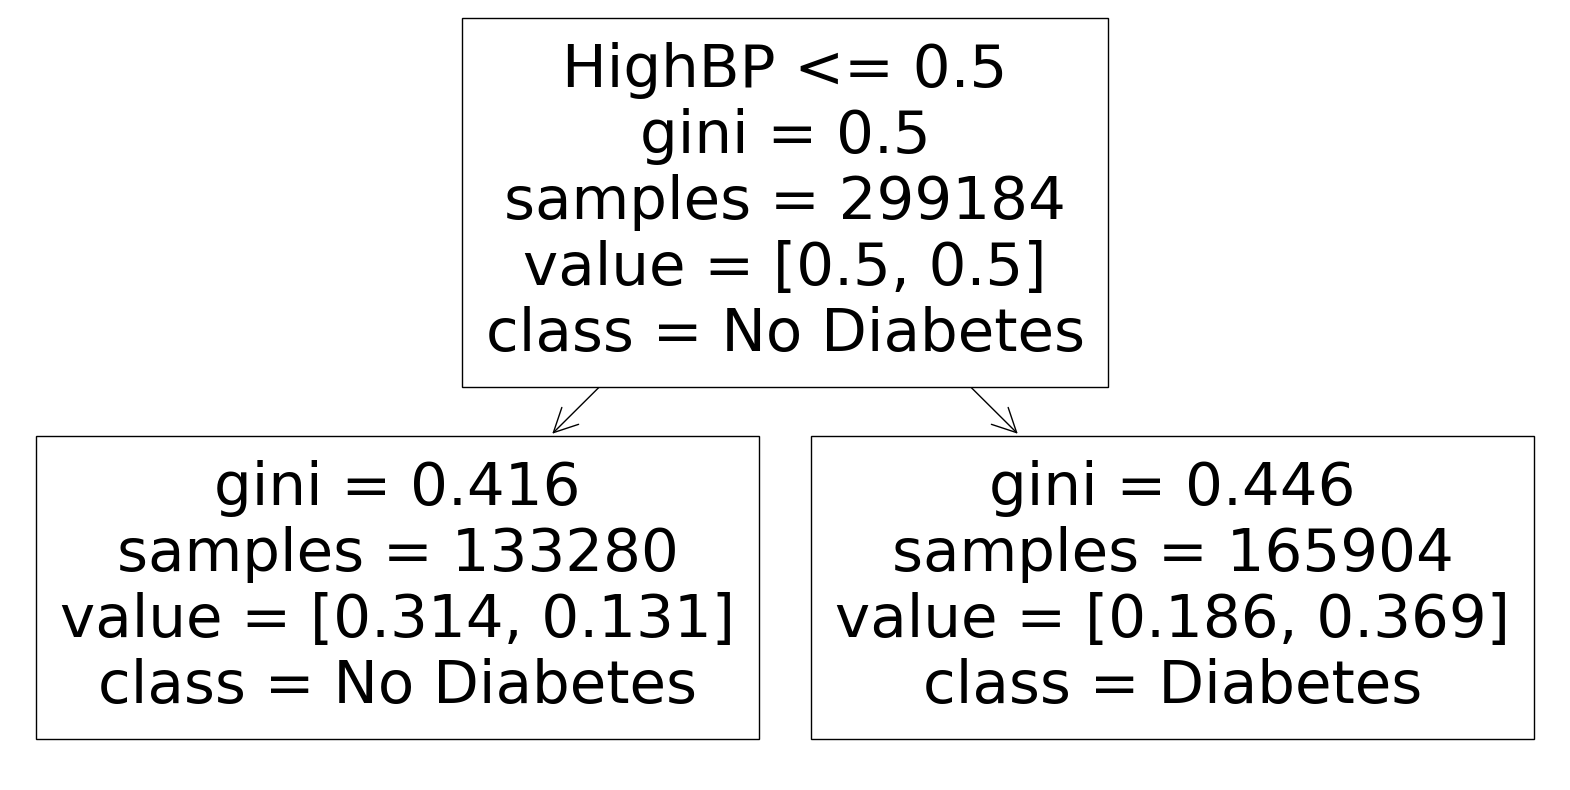

In [54]:
#TODO only one layer => decision stump

import matplotlib.pyplot as plt
from sklearn import tree

# Visualize the first tree of the model (with this model only one split and layer occurs)
plt.figure(figsize=(20, 10))
tree.plot_tree(
    adaptive_boosting_oversampling_random.estimators_[0],  
    feature_names=X_train_oversampling_random.columns,
    class_names=["No Diabetes", "Diabetes"],
)
plt.show()

In [55]:
# save model to pkl file for later reuse
import joblib
from datetime import datetime

# Get the current timestamp
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")

# Save the model to a file with a timestamp
model_filename = f'../models/decision_trees_ensembles/adab_model_oversampling_random{timestamp}.pkl'
joblib.dump(adaptive_boosting_oversampling_random, model_filename)

print(f"Model saved to '{model_filename}'")

Model saved to '../models/decision_trees_ensembles/adab_model_oversampling_random20241129_144414.pkl'


In [56]:
from xgboost import XGBClassifier

# Initialize the XGBoost ensemble model (with a decision tree as the default base classifier and other default parameters)
extreme_gradient_boosting_oversampling_random = XGBClassifier(random_state=42)

# Train the model on the preprocessed training data
extreme_gradient_boosting_oversampling_random.fit(X_train_oversampling_random, y_train_oversampling_random)

# Make predictions on the training set
y_train_pred_oversampling_random = extreme_gradient_boosting_oversampling_random.predict(X_train_oversampling_random)

# Evaluate the model's performance on the training dataset
accuracy_train_oversampling_random = accuracy_score(y_train_oversampling_random, y_train_pred_oversampling_random)

# Make predictions on the validation set
y_val_pred = extreme_gradient_boosting_oversampling_random.predict(X_val)

# Evaluate the model's performance on the validation dataset
report = classification_report(y_val, y_val_pred, digits=4)

print("Training Accuracy", accuracy_train_oversampling_random)
print("Classification Report:\n", report)

Training Accuracy 0.7730059094069202
Classification Report:
               precision    recall  f1-score   support

         0.0     0.9408    0.7155    0.8128     21797
         1.0     0.3330    0.7592    0.4629      4078

    accuracy                         0.7224     25875
   macro avg     0.6369    0.7373    0.6379     25875
weighted avg     0.8450    0.7224    0.7576     25875



<Figure size 30000x15000 with 0 Axes>

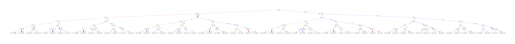

In [57]:
import matplotlib.pyplot as plt
from xgboost import plot_tree
import xgboost as xgb


# Visualize the first tree of the model
plt.figure(figsize=(300, 150))  
plot_tree(extreme_gradient_boosting_oversampling_random)
plt.show()

In [58]:
# save model to pkl file for later reuse
import joblib
from datetime import datetime

# Get the current timestamp
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")

# Save the model to a file with a timestamp
model_filename = f'../models/decision_trees_ensembles/xgb_model_oversampling_random{timestamp}.pkl'
joblib.dump(extreme_gradient_boosting_oversampling_random, model_filename)

print(f"Model saved to '{model_filename}'")

Model saved to '../models/decision_trees_ensembles/xgb_model_oversampling_random20241129_144427.pkl'


### SMOTE Oversampling

In [59]:
# test smote oversampling
X_train_oversampling_smote, y_train_oversampling_smote = data_loader.training_data_oversampling_smote
X_val, y_val = data_loader.validation_data
X_test, y_test = data_loader.test_data

print(f"X_train_oversampling_smote shape: {X_train_oversampling_smote.shape}")
print(f"y_train_oversampling_smote shape: {y_train_oversampling_smote.shape}")
print(f"X_val shape: {X_val.shape}")
print(f"y_val shape: {y_val.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train_oversampling_smote shape: (299184, 21)
y_train_oversampling_smote shape: (299184,)
X_val shape: (25875, 21)
y_val shape: (25875,)
X_test shape: (50229, 21)
y_test shape: (50229,)


In [60]:
# Imports for the decision tree model
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the decision tree model with default parameters
decision_tree_oversampling_smote = DecisionTreeClassifier(random_state=42)

# Train the model on the preprocessed training data
decision_tree_oversampling_smote.fit(X_train_oversampling_smote, y_train_oversampling_smote)

# Make predictions on the training set
y_train_pred_oversampling_smote = decision_tree_oversampling_smote.predict(X_train_oversampling_smote)

# Evaluate the model's performance on the training dataset
accuracy_train_oversampling_smote = accuracy_score(y_train_oversampling_smote, y_train_pred_oversampling_smote)

# Make predictions on the validation set
y_val_pred = decision_tree.predict(X_val)

# Evaluate the model's performance on the validation dataset
report = classification_report(y_val, y_val_pred, digits=4)

print("Training Accuracy", accuracy_train_oversampling_smote)
print("Classification Report:\n", report)

Training Accuracy 0.9883917589175891
Classification Report:
               precision    recall  f1-score   support

         0.0     0.8723    0.8666    0.8694     21797
         1.0     0.3111    0.3220    0.3164      4078

    accuracy                         0.7808     25875
   macro avg     0.5917    0.5943    0.5929     25875
weighted avg     0.7839    0.7808    0.7823     25875



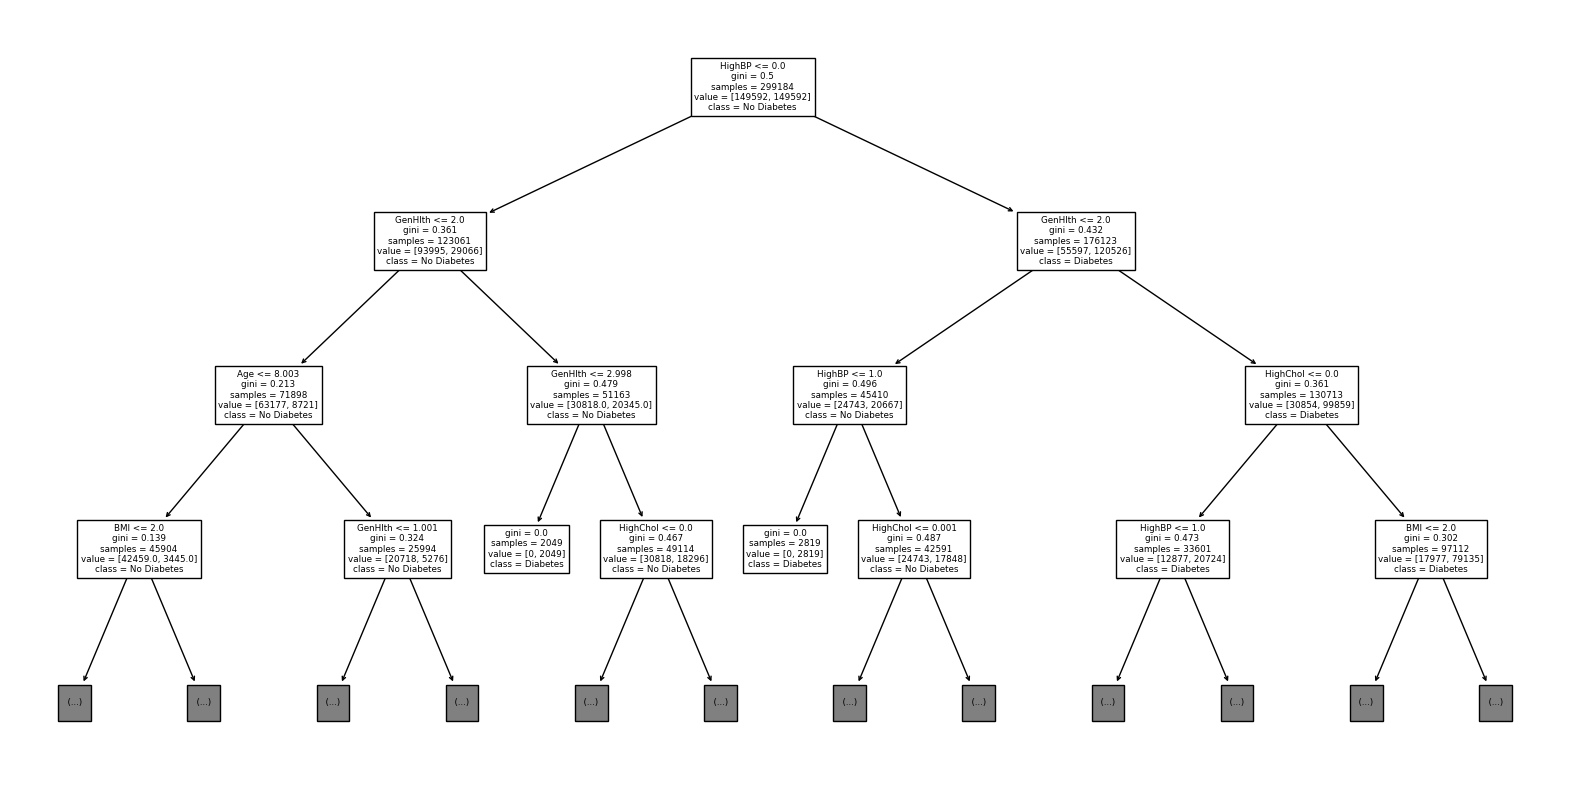

In [61]:
#TODO is three layers already too much?

import matplotlib.pyplot as plt
from sklearn import tree

# Visualize the tree of the model but only show the first three layers (max_depth=3)
plt.figure(figsize=(20, 10))
tree.plot_tree(
    decision_tree_oversampling_smote,
    feature_names=X_train_oversampling_smote.columns,
    class_names=["No Diabetes", "Diabetes"],
    max_depth=3 
)
plt.show()

In [62]:
# save model to pkl file for later reuse
import joblib
from datetime import datetime

# Get the current timestamp
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")

# Save the model to a file with a timestamp
model_filename = f'../models/decision_trees_ensembles/dt_model_oversampling_smote{timestamp}.pkl'
joblib.dump(decision_tree_oversampling_smote, model_filename)

print(f"Model saved to '{model_filename}'")

Model saved to '../models/decision_trees_ensembles/dt_model_oversampling_smote20241129_144437.pkl'


In [63]:
# Imports for the bagging classifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the base estimator
estimator = DecisionTreeClassifier(random_state=42)

# Initialize the Bagging classifier with the base estimator
bagging_decision_tree_oversampling_smote = BaggingClassifier(estimator=estimator, n_estimators=100, random_state=42)

# Train the model on the preprocessed training data
bagging_decision_tree_oversampling_smote.fit(X_train_oversampling_smote, y_train_oversampling_smote)

# Make predictions on the training set
y_train_pred_oversampling_smote = bagging_decision_tree_oversampling_smote.predict(X_train_oversampling_smote)

# Evaluate the model's performance on the training dataset
accuracy_train_oversampling_smote = accuracy_score(y_train_oversampling_smote, y_train_pred_oversampling_smote)

# Make predictions on the validation set
y_val_pred = bagging_decision_tree_oversampling_smote.predict(X_val)

# Evaluate the model's performance on the validation dataset
report = classification_report(y_val, y_val_pred, digits=4)

print("Training Accuracy", accuracy_train_oversampling_smote)
print("Classification Report:\n", report)

Training Accuracy 0.9883884164928606
Classification Report:
               precision    recall  f1-score   support

         0.0     0.8744    0.9249    0.8990     21797
         1.0     0.4194    0.2898    0.3428      4078

    accuracy                         0.8249     25875
   macro avg     0.6469    0.6074    0.6209     25875
weighted avg     0.8027    0.8249    0.8113     25875



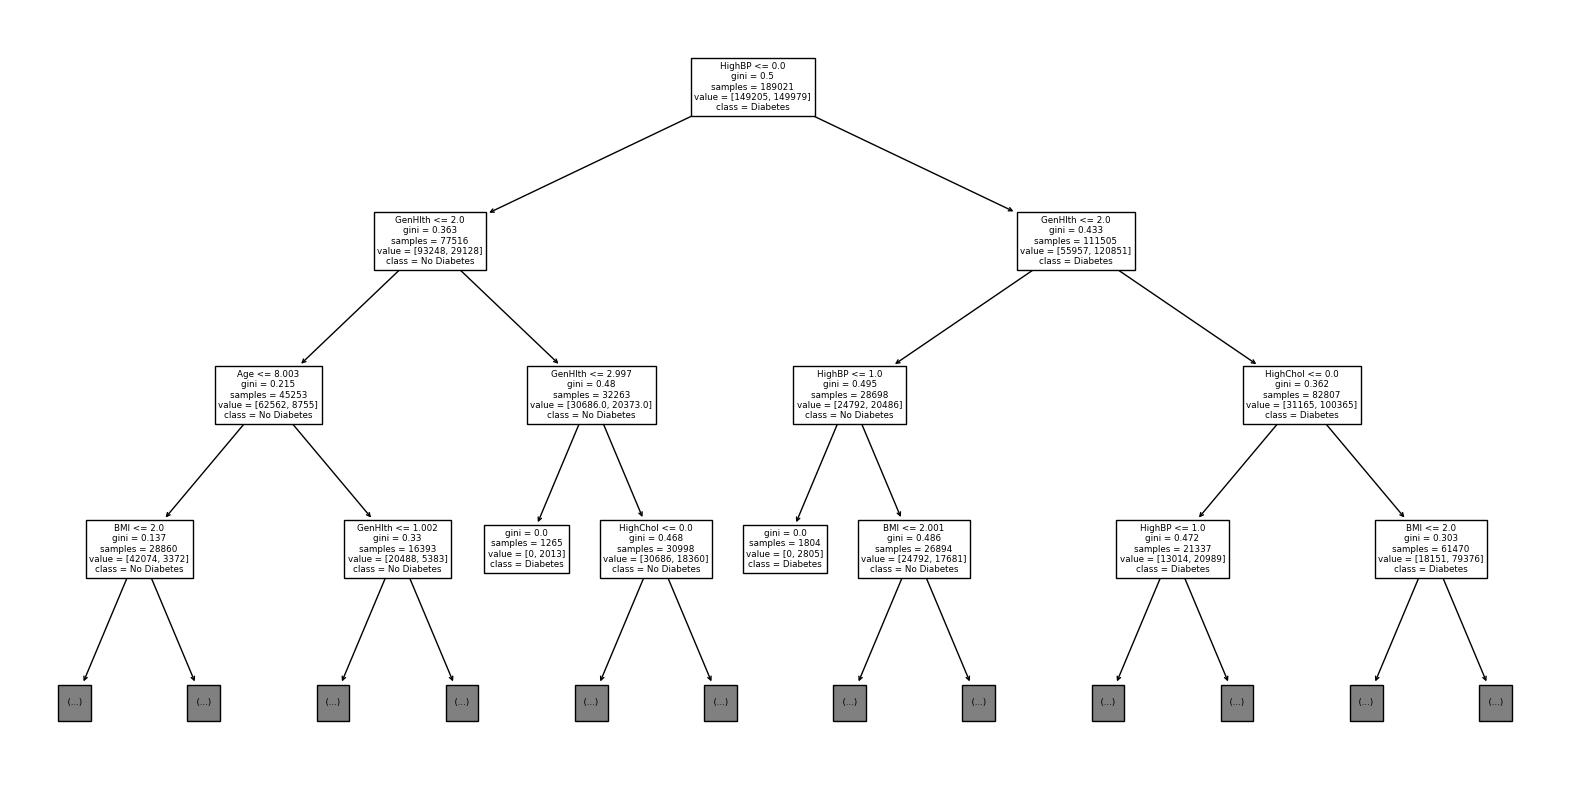

In [64]:
 #TODO is three layers already too much?

import matplotlib.pyplot as plt
from sklearn import tree

# Visualize the first tree of the model but only show the first three layers (max_depth=3)
plt.figure(figsize=(20, 10))
tree.plot_tree(
    bagging_decision_tree_oversampling_smote.estimators_[0],
    feature_names=X_train_oversampling_smote.columns,
    class_names=["No Diabetes", "Diabetes"],
    max_depth=3 
)
plt.show()

In [65]:
# save model to pkl file for later reuse
import joblib
from datetime import datetime

# Get the current timestamp
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")

# Save the model to a file with a timestamp
model_filename = f'../models/decision_trees_ensembles/dt_model_oversampling_smote{timestamp}.pkl'
joblib.dump(decision_tree_oversampling_smote, model_filename)

print(f"Model saved to '{model_filename}'")

Model saved to '../models/decision_trees_ensembles/dt_model_oversampling_smote20241129_144659.pkl'


In [66]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

#TODO Adjust max_depth to? 
#TODO random_state = 0 soll üblich sein für reproducability, habe aber auch 42 gelesen als arbitrary number?
#TODO is it okay to set zero_division to 1?

# Initialize the random forest ensemble model with default parameters
bagging_random_forest_oversampling_smote = RandomForestClassifier(random_state=42)

# Train the model on the preprocessed training data
bagging_random_forest_oversampling_smote.fit(X_train, y_train)

# Make predictions on the training set
y_train_pred_oversampling_smote = bagging_random_forest_oversampling_smote.predict(X_train)

# Evaluate the model's performance on the training dataset
accuracy_train_oversampling_smote = accuracy_score(y_train_pred_oversampling_smote, y_train_pred_oversampling_smote)

# Make predictions on the validation set
y_val_pred = bagging_random_forest_oversampling_smote.predict(X_val)

# Evaluate the model's performance on the validation dataset
report = classification_report(y_val, y_val_pred, digits=4)

print("Training Accuracy", accuracy_train_oversampling_smote)
print("Classification Report:\n", report)

Training Accuracy 1.0
Classification Report:
               precision    recall  f1-score   support

         0.0     0.8667    0.9547    0.9086     21797
         1.0     0.4702    0.2151    0.2951      4078

    accuracy                         0.8381     25875
   macro avg     0.6685    0.5849    0.6018     25875
weighted avg     0.8042    0.8381    0.8119     25875



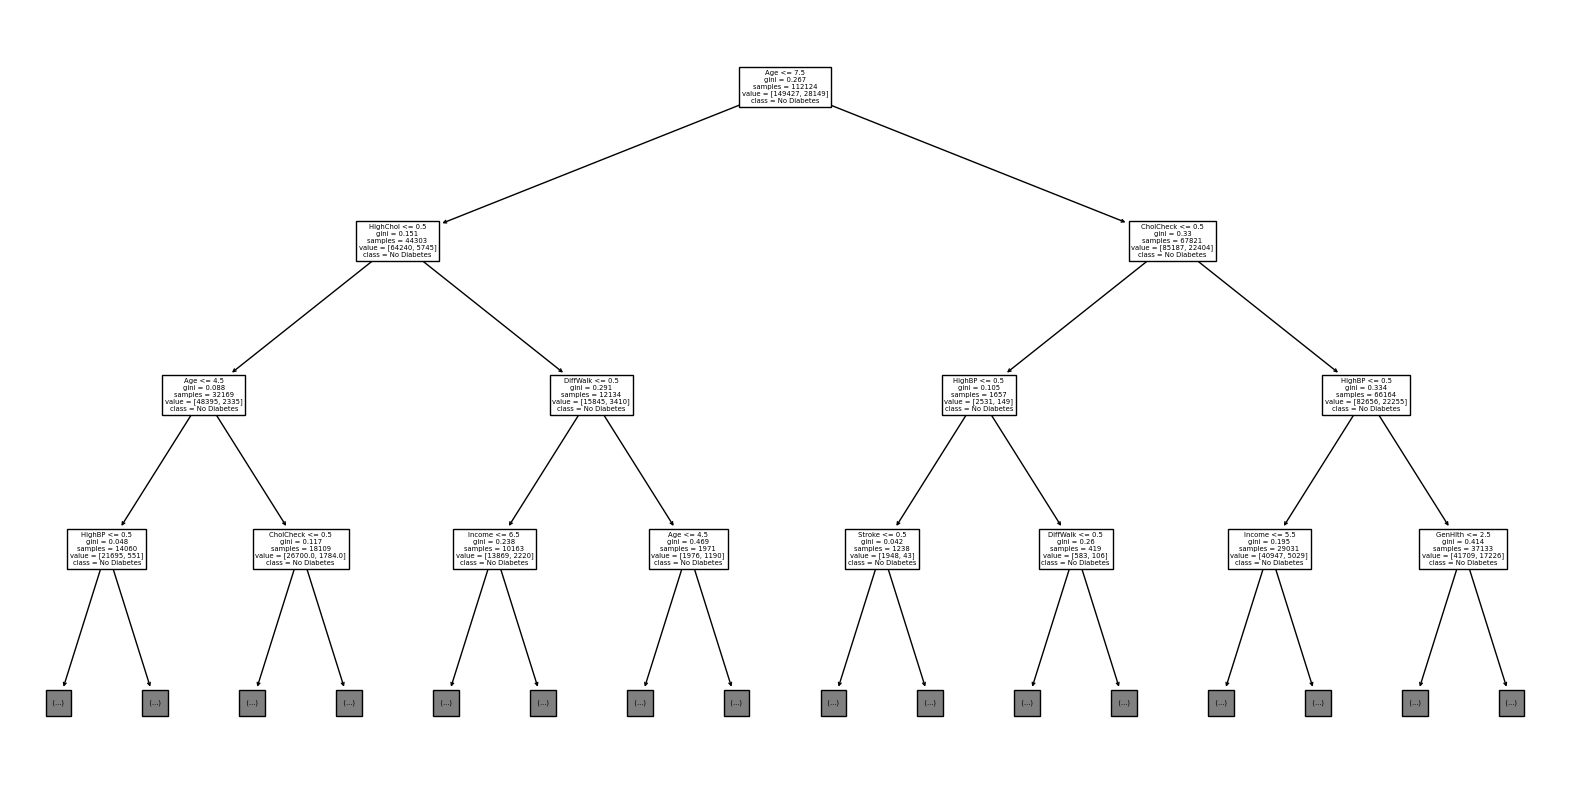

In [69]:
#TODO only one layer => decision stump

import matplotlib.pyplot as plt
from sklearn import tree

# Visualize the first tree of the model 
plt.figure(figsize=(20, 10))
tree.plot_tree(
    bagging_random_forest_oversampling_smote.estimators_[0],  
    feature_names=X_train_oversampling_smote.columns,
    class_names=["No Diabetes", "Diabetes"],
    max_depth=3 
)
plt.show()

In [70]:
# save model to pkl file for later reuse
import joblib
from datetime import datetime

# Get the current timestamp
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")

# Save the model to a file with a timestamp
model_filename = f'../models/decision_trees_ensembles/brf_model_oversampling_smote{timestamp}.pkl'
joblib.dump(bagging_random_forest_oversampling_smote, model_filename)

print(f"Model saved to '{model_filename}'")

Model saved to '../models/decision_trees_ensembles/brf_model_oversampling_smote20241129_145021.pkl'


In [71]:
from sklearn.ensemble import AdaBoostClassifier

# Initialize the AdaBoost ensemble model (with a decision tree as the default base classifier and other default parameters)
adaptive_boosting_oversampling_smote = AdaBoostClassifier(random_state=42)

# Train the model on the preprocessed training data
adaptive_boosting_oversampling_smote.fit(X_train_oversampling_smote, y_train_oversampling_smote)

# Make predictions on the training set
y_train_pred_oversampling_smote = adaptive_boosting_oversampling_smote.predict(X_train_oversampling_smote)

# Evaluate the model's performance on the training dataset
accuracy_train_oversampling_smote = accuracy_score(y_train_oversampling_smote, y_train_pred_oversampling_smote)

# Make predictions on the validation set
y_val_pred = adaptive_boosting_oversampling_smote.predict(X_val)

# Evaluate the model's performance on the validation dataset
report = classification_report(y_val, y_val_pred, digits=4)

print("Training Accuracy", accuracy_train_oversampling_smote)
print("Classification Report:\n", report)

Training Accuracy 0.8184662281405423
Classification Report:
               precision    recall  f1-score   support

         0.0     0.9233    0.7937    0.8536     21797
         1.0     0.3700    0.6474    0.4708      4078

    accuracy                         0.7707     25875
   macro avg     0.6466    0.7206    0.6622     25875
weighted avg     0.8361    0.7707    0.7933     25875



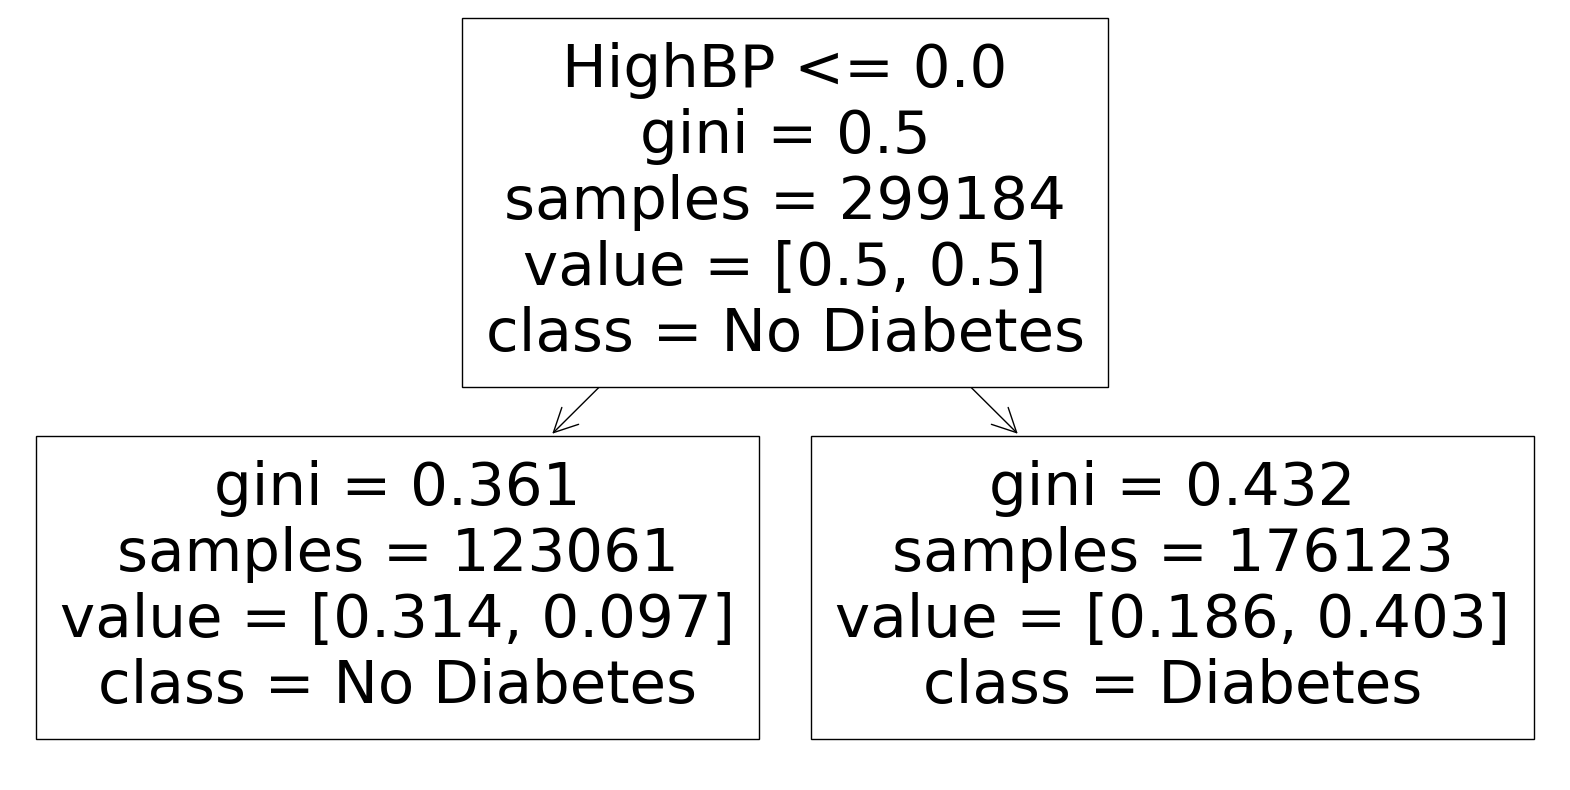

In [72]:
#TODO only one layer => decision stump

import matplotlib.pyplot as plt
from sklearn import tree

# Visualize the first tree of the model (with this model only one split and layer occurs)
plt.figure(figsize=(20, 10))
tree.plot_tree(
    adaptive_boosting_oversampling_smote.estimators_[0],  
    feature_names=X_train_oversampling_smote.columns,
    class_names=["No Diabetes", "Diabetes"],
)
plt.show()

In [73]:
# save model to pkl file for later reuse
import joblib
from datetime import datetime

# Get the current timestamp
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")

# Save the model to a file with a timestamp
model_filename = f'../models/decision_trees_ensembles/adab_model_oversampling_smote{timestamp}.pkl'
joblib.dump(adaptive_boosting_oversampling_smote, model_filename)

print(f"Model saved to '{model_filename}'")

Model saved to '../models/decision_trees_ensembles/adab_model_oversampling_smote20241129_145035.pkl'


In [74]:
from xgboost import XGBClassifier

# Initialize the XGBoost ensemble model (with a decision tree as the default base classifier and other default parameters)
extreme_gradient_boosting_oversampling_smote = XGBClassifier(random_state=42)

# Train the model on the preprocessed training data
extreme_gradient_boosting_oversampling_smote.fit(X_train_oversampling_smote, y_train_oversampling_smote)

# Make predictions on the training set
y_train_pred_oversampling_smote = extreme_gradient_boosting_oversampling_smote.predict(X_train_oversampling_smote)

# Evaluate the model's performance on the training dataset
accuracy_train_oversampling_smote = accuracy_score(y_train_oversampling_smote, y_train_pred_oversampling_smote)

# Make predictions on the validation set
y_val_pred = extreme_gradient_boosting_oversampling_smote.predict(X_val)

# Evaluate the model's performance on the validation dataset
report = classification_report(y_val, y_val_pred, digits=4)

print("Training Accuracy", accuracy_train_oversampling_smote)
print("Classification Report:\n", report)

Training Accuracy 0.906171453018878
Classification Report:
               precision    recall  f1-score   support

         0.0     0.8711    0.9588    0.9128     21797
         1.0     0.5228    0.2415    0.3304      4078

    accuracy                         0.8457     25875
   macro avg     0.6970    0.6001    0.6216     25875
weighted avg     0.8162    0.8457    0.8210     25875



<Figure size 30000x15000 with 0 Axes>

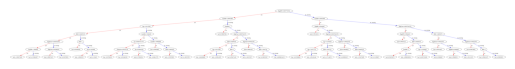

In [75]:
import matplotlib.pyplot as plt
from xgboost import plot_tree
import xgboost as xgb


# Visualize the first tree of the model
plt.figure(figsize=(300, 150))  
plot_tree(extreme_gradient_boosting_oversampling_smote)
plt.show()

In [76]:
# save model to pkl file for later reuse
import joblib
from datetime import datetime

# Get the current timestamp
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")

# Save the model to a file with a timestamp
model_filename = f'../models/decision_trees_ensembles/xgb_model_oversampling_smote{timestamp}.pkl'
joblib.dump(extreme_gradient_boosting_oversampling_smote, model_filename)

print(f"Model saved to '{model_filename}'")

Model saved to '../models/decision_trees_ensembles/xgb_model_oversampling_smote20241129_145049.pkl'


### SMOTE Tomek

In [77]:
X_train_oversampling_smote_tomek, y_train_oversampling_smote_tomek = data_loader.training_data_resampling_smote_tomek
X_val, y_val = data_loader.validation_data
X_test, y_test = data_loader.test_data

print(f"X_train_oversampling_smote shape: {X_train_oversampling_smote_tomek.shape}")
print(f"y_train_oversampling_smote shape: {y_train_oversampling_smote_tomek.shape}")
print(f"X_val shape: {X_val.shape}")
print(f"y_val shape: {y_val.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train_oversampling_smote shape: (298548, 21)
y_train_oversampling_smote shape: (298548,)
X_val shape: (25875, 21)
y_val shape: (25875,)
X_test shape: (50229, 21)
y_test shape: (50229,)


In [78]:
# Imports for the decision tree model
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the decision tree model with default parameters
decision_tree_oversampling_smote_tomek = DecisionTreeClassifier(random_state=42)

# Train the model on the preprocessed training data
decision_tree_oversampling_smote_tomek.fit(X_train_oversampling_smote_tomek, y_train_oversampling_smote_tomek)

# Make predictions on the training set
y_train_pred_oversampling_smote_tomek = decision_tree_oversampling_smote_tomek.predict(X_train_oversampling_smote_tomek)

# Evaluate the model's performance on the training dataset
accuracy_train_oversampling_smote_tomek = accuracy_score(y_train_oversampling_smote_tomek, y_train_pred_oversampling_smote_tomek)

# Make predictions on the validation set
y_val_pred = decision_tree_oversampling_smote_tomek.predict(X_val)

# Evaluate the model's performance on the validation dataset
report = classification_report(y_val, y_val_pred, digits=4)

print("Training Accuracy", accuracy_train_oversampling_smote_tomek)
print("Classification Report:\n", report)

Training Accuracy 0.9883670297573589
Classification Report:
               precision    recall  f1-score   support

         0.0     0.8747    0.8656    0.8701     21797
         1.0     0.3193    0.3369    0.3279      4078

    accuracy                         0.7823     25875
   macro avg     0.5970    0.6013    0.5990     25875
weighted avg     0.7871    0.7823    0.7847     25875



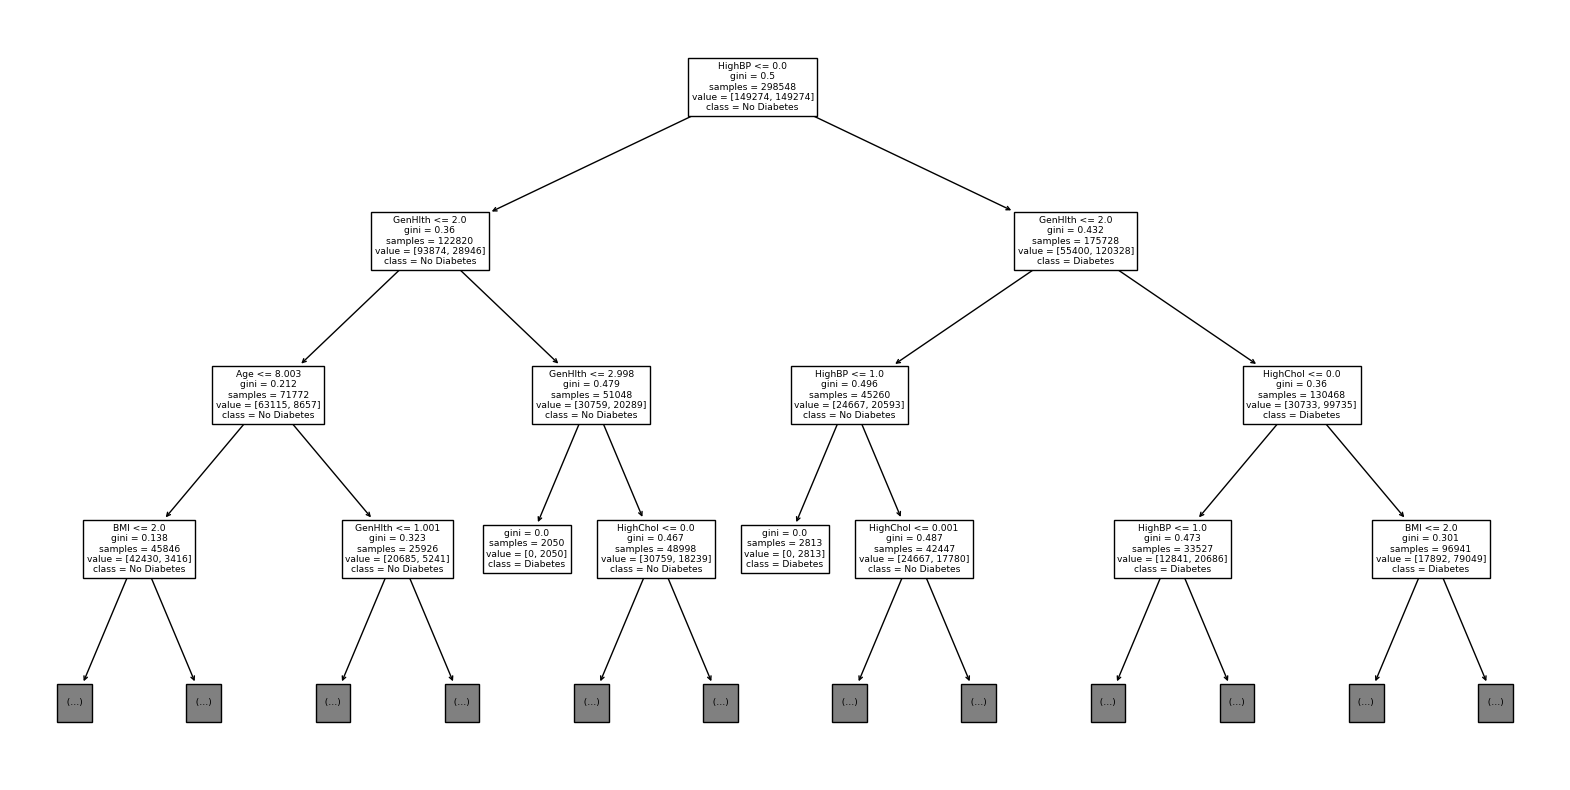

In [79]:
#TODO is three layers already too much?

import matplotlib.pyplot as plt
from sklearn import tree

# Visualize the tree of the model but only show the first three layers (max_depth=3)
plt.figure(figsize=(20, 10))
tree.plot_tree(
    decision_tree_oversampling_smote_tomek,
    feature_names=X_train_oversampling_smote_tomek.columns,
    class_names=["No Diabetes", "Diabetes"],
    max_depth=3 
)
plt.show()

In [80]:
# save model to pkl file for later reuse
import joblib
from datetime import datetime

# Get the current timestamp
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")

# Save the model to a file with a timestamp
model_filename = f'../models/decision_trees_ensembles/dt_model_oversampling_smote_tomek{timestamp}.pkl'
joblib.dump(decision_tree_oversampling_smote_tomek, model_filename)

print(f"Model saved to '{model_filename}'")

Model saved to '../models/decision_trees_ensembles/dt_model_oversampling_smote_tomek20241129_145102.pkl'


In [81]:
# Imports for the bagging classifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the base estimator
estimator = DecisionTreeClassifier(random_state=42)

# Initialize the Bagging classifier with the base estimator
bagging_decision_tree_oversampling_smote_tomek = BaggingClassifier(estimator=estimator, n_estimators=100, random_state=42)

# Train the model on the preprocessed training data
bagging_decision_tree_oversampling_smote_tomek.fit(X_train_oversampling_smote_tomek, y_train_oversampling_smote_tomek)

# Make predictions on the training set
y_train_pred_oversampling_smote_tomek = bagging_decision_tree_oversampling_smote_tomek.predict(X_train_oversampling_smote_tomek)

# Evaluate the model's performance on the training dataset
accuracy_train_oversampling_smote_tomek = accuracy_score(y_train_oversampling_smote_tomek, y_train_pred_oversampling_smote_tomek)

# Make predictions on the validation set
y_val_pred = bagging_decision_tree_oversampling_smote_tomek.predict(X_val)

# Evaluate the model's performance on the validation dataset
report = classification_report(y_val, y_val_pred, digits=4)

print("Training Accuracy", accuracy_train_oversampling_smote_tomek)
print("Classification Report:\n", report)

Training Accuracy 0.9883435829414365
Classification Report:
               precision    recall  f1-score   support

         0.0     0.8729    0.9230    0.8972     21797
         1.0     0.4061    0.2815    0.3325      4078

    accuracy                         0.8219     25875
   macro avg     0.6395    0.6022    0.6149     25875
weighted avg     0.7993    0.8219    0.8082     25875



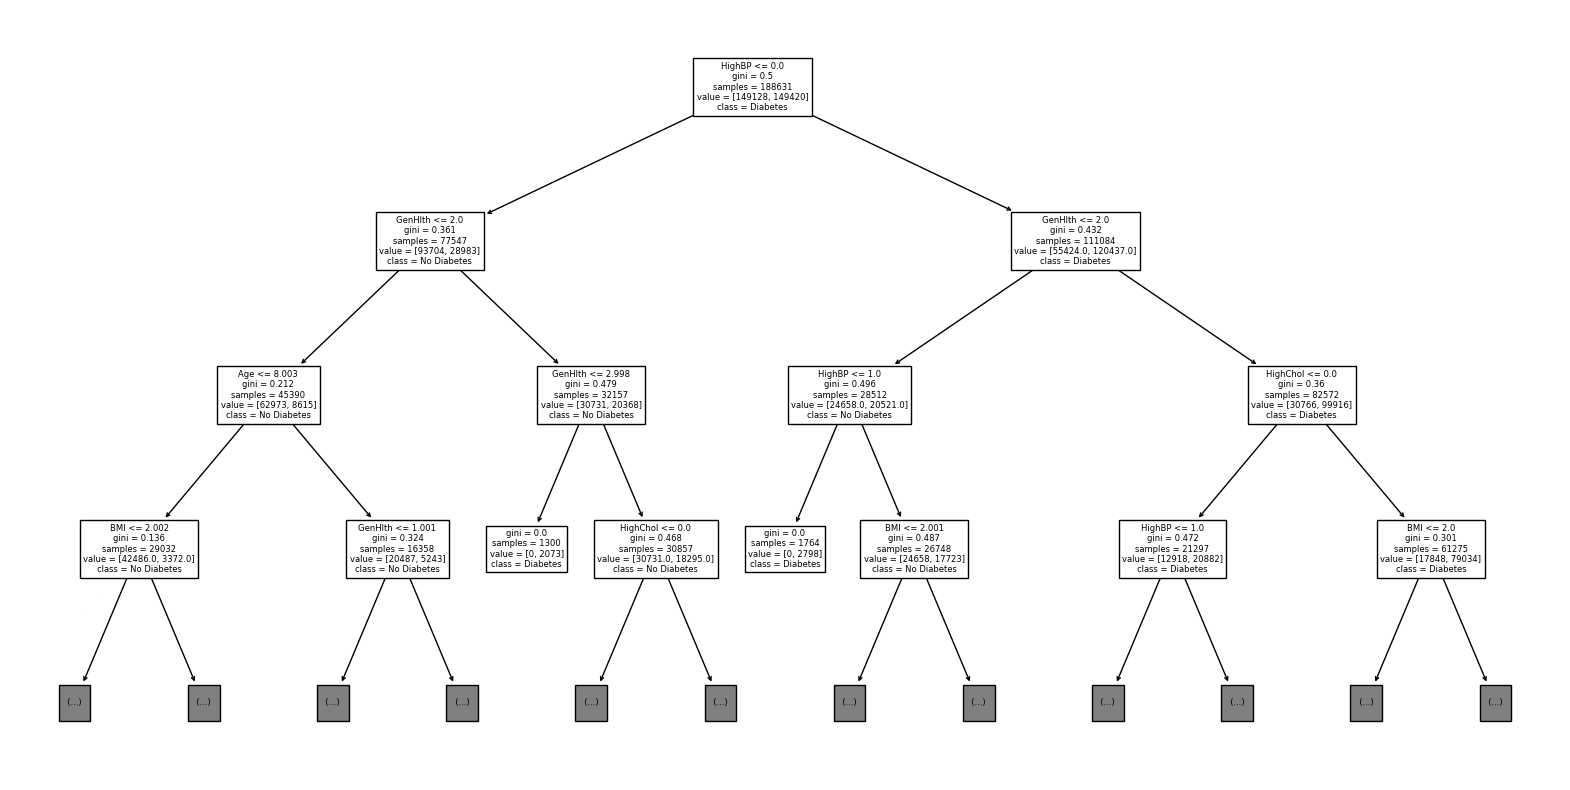

In [82]:
 #TODO is three layers already too much?

import matplotlib.pyplot as plt
from sklearn import tree

# Visualize the first tree of the model but only show the first three layers (max_depth=3)
plt.figure(figsize=(20, 10))
tree.plot_tree(
    bagging_decision_tree_oversampling_smote_tomek.estimators_[0],
    feature_names=X_train_oversampling_smote_tomek.columns,
    class_names=["No Diabetes", "Diabetes"],
    max_depth=3 
)
plt.show()

In [83]:
# save model to pkl file for later reuse
import joblib
from datetime import datetime

# Get the current timestamp
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")

# Save the model to a file with a timestamp
model_filename = f'../models/decision_trees_ensembles/bdt_model_oversampling_smote_tomek{timestamp}.pkl'
joblib.dump(bagging_decision_tree_oversampling_smote_tomek, model_filename)

print(f"Model saved to '{model_filename}'")

Model saved to '../models/decision_trees_ensembles/bdt_model_oversampling_smote_tomek20241129_151558.pkl'


In [84]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

#TODO Adjust max_depth to? 
#TODO random_state = 0 soll üblich sein für reproducability, habe aber auch 42 gelesen als arbitrary number?
#TODO is it okay to set zero_division to 1?

# Initialize the random forest ensemble model with default parameters
bagging_random_forest_oversampling_smote_tomek = RandomForestClassifier(random_state=42)

# Train the model on the preprocessed training data
bagging_random_forest_oversampling_smote_tomek.fit(X_train, y_train)

# Make predictions on the training set
y_train_pred_oversampling_smote_tomek = bagging_random_forest_oversampling_smote_tomek.predict(X_train)

# Evaluate the model's performance on the training dataset
accuracy_train_oversampling_smote = accuracy_score(y_train_pred_oversampling_smote_tomek, y_train_pred_oversampling_smote_tomek)

# Make predictions on the validation set
y_val_pred = bagging_random_forest_oversampling_smote.predict(X_val)

# Evaluate the model's performance on the validation dataset
report = classification_report(y_val, y_val_pred, digits=4)

print("Training Accuracy", accuracy_train_oversampling_smote_tomek)
print("Classification Report:\n", report)

Training Accuracy 0.9883435829414365
Classification Report:
               precision    recall  f1-score   support

         0.0     0.8667    0.9547    0.9086     21797
         1.0     0.4702    0.2151    0.2951      4078

    accuracy                         0.8381     25875
   macro avg     0.6685    0.5849    0.6018     25875
weighted avg     0.8042    0.8381    0.8119     25875



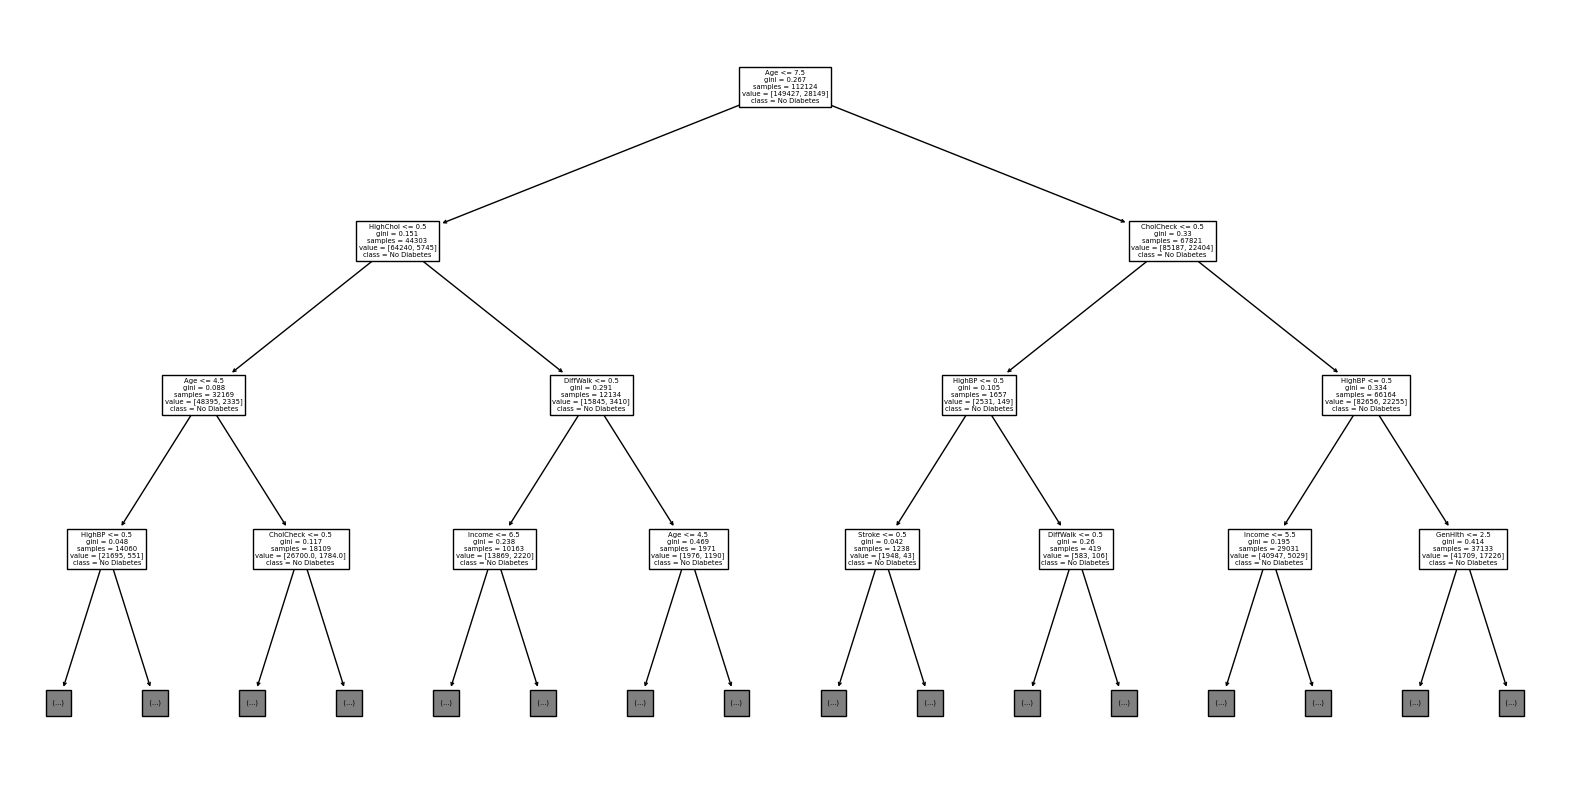

In [86]:
#TODO only one layer => decision stump

import matplotlib.pyplot as plt
from sklearn import tree

# Visualize the first tree of the model 
plt.figure(figsize=(20, 10))
tree.plot_tree(
    bagging_random_forest_oversampling_smote_tomek.estimators_[0],  
    feature_names=X_train_oversampling_smote_tomek.columns,
    class_names=["No Diabetes", "Diabetes"],
    max_depth=3 
)
plt.show()

In [87]:
# save model to pkl file for later reuse
import joblib
from datetime import datetime

# Get the current timestamp
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")

# Save the model to a file with a timestamp
model_filename = f'../models/decision_trees_ensembles/brf_model_oversampling_smote_tomek{timestamp}.pkl'
joblib.dump(bagging_random_forest_oversampling_smote_tomek, model_filename)

print(f"Model saved to '{model_filename}'")

Model saved to '../models/decision_trees_ensembles/brf_model_oversampling_smote_tomek20241129_151807.pkl'


In [88]:
from sklearn.ensemble import AdaBoostClassifier

# Initialize the AdaBoost ensemble model (with a decision tree as the default base classifier and other default parameters)
adaptive_boosting_oversampling_smote_tomek = AdaBoostClassifier(random_state=42)

# Train the model on the preprocessed training data
adaptive_boosting_oversampling_smote_tomek.fit(X_train_oversampling_smote_tomek, y_train_oversampling_smote_tomek)

# Make predictions on the training set
y_train_pred_oversampling_smote_tomek = adaptive_boosting_oversampling_smote_tomek.predict(X_train_oversampling_smote_tomek)

# Evaluate the model's performance on the training dataset
accuracy_train_oversampling_smote_tomek = accuracy_score(y_train_oversampling_smote_tomek, y_train_pred_oversampling_smote_tomek)

# Make predictions on the validation set
y_val_pred = adaptive_boosting_oversampling_smote_tomek.predict(X_val)

# Evaluate the model's performance on the validation dataset
report = classification_report(y_val, y_val_pred, digits=4)

print("Training Accuracy", accuracy_train_oversampling_smote_tomek)
print("Classification Report:\n", report)

Training Accuracy 0.8191547087905462
Classification Report:
               precision    recall  f1-score   support

         0.0     0.9232    0.7941    0.8538     21797
         1.0     0.3702    0.6471    0.4710      4078

    accuracy                         0.7709     25875
   macro avg     0.6467    0.7206    0.6624     25875
weighted avg     0.8361    0.7709    0.7935     25875



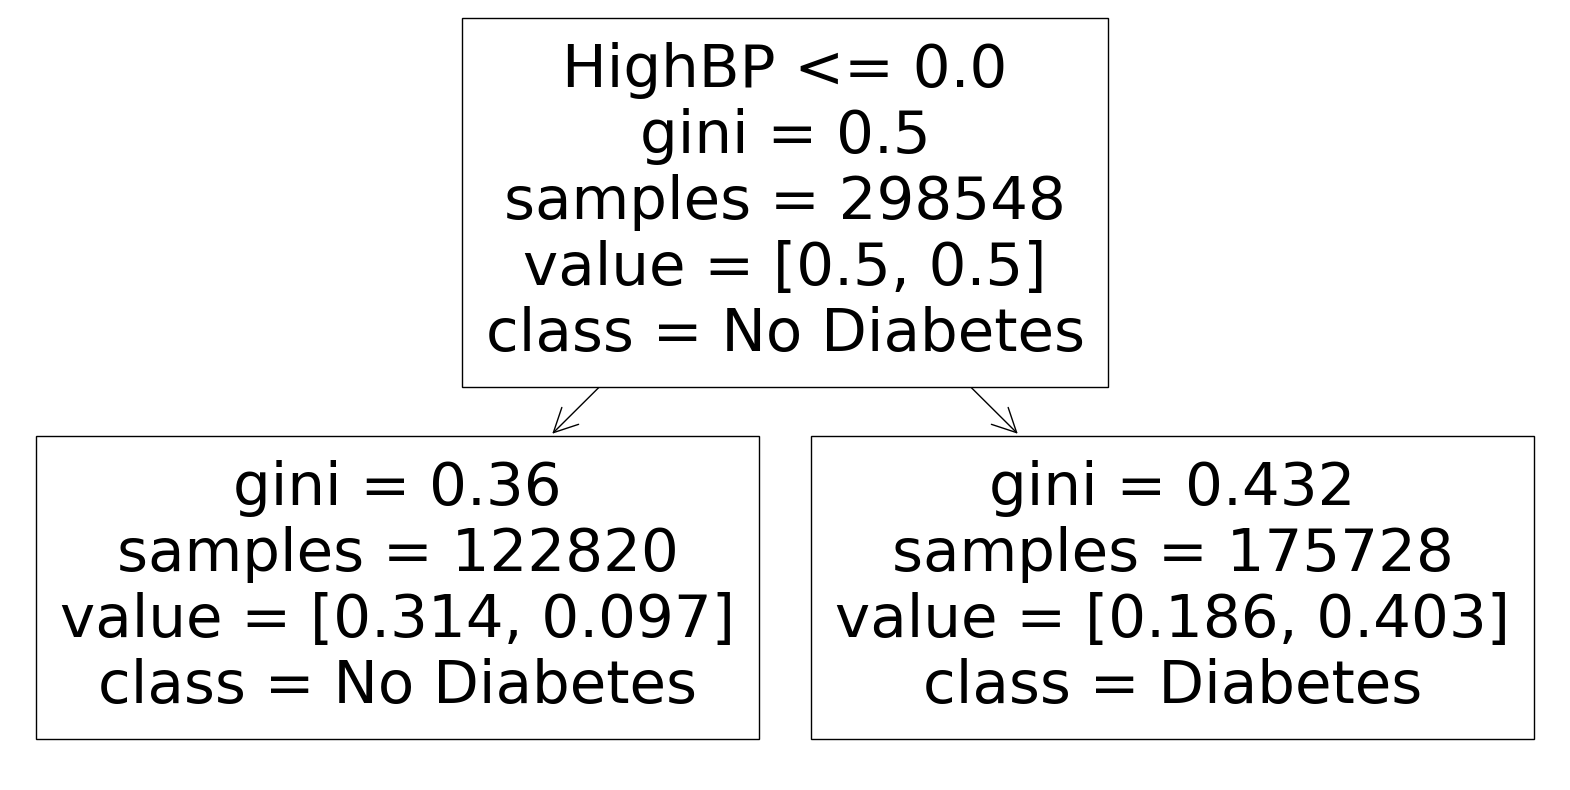

In [89]:
#TODO only one layer => decision stump

import matplotlib.pyplot as plt
from sklearn import tree

# Visualize the first tree of the model (with this model only one split and layer occurs)
plt.figure(figsize=(20, 10))
tree.plot_tree(
    adaptive_boosting_oversampling_smote_tomek.estimators_[0],  
    feature_names=X_train_oversampling_smote_tomek.columns,
    class_names=["No Diabetes", "Diabetes"],
)
plt.show()

In [90]:
from xgboost import XGBClassifier

# Initialize the XGBoost ensemble model (with a decision tree as the default base classifier and other default parameters)
extreme_gradient_boosting_oversampling_smote_tomek = XGBClassifier(random_state=42)

# Train the model on the preprocessed training data
extreme_gradient_boosting_oversampling_smote_tomek.fit(X_train_oversampling_smote_tomek, y_train_oversampling_smote_tomek)

# Make predictions on the training set
y_train_pred_oversampling_smote_tomek = extreme_gradient_boosting_oversampling_smote_tomek.predict(X_train_oversampling_smote_tomek)

# Evaluate the model's performance on the training dataset
accuracy_train_oversampling_smote_tomek = accuracy_score(y_train_oversampling_smote_tomek, y_train_pred_oversampling_smote_tomek)

# Make predictions on the validation set
y_val_pred = extreme_gradient_boosting_oversampling_smote_tomek.predict(X_val)

# Evaluate the model's performance on the validation dataset
report = classification_report(y_val, y_val_pred, digits=4)

print("Training Accuracy", accuracy_train_oversampling_smote_tomek)
print("Classification Report:\n", report)

Training Accuracy 0.9062663290325174
Classification Report:
               precision    recall  f1-score   support

         0.0     0.8709    0.9573    0.9120     21797
         1.0     0.5138    0.2413    0.3284      4078

    accuracy                         0.8444     25875
   macro avg     0.6924    0.5993    0.6202     25875
weighted avg     0.8146    0.8444    0.8200     25875



<Figure size 30000x15000 with 0 Axes>

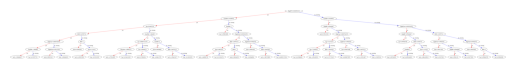

In [91]:
import matplotlib.pyplot as plt
from xgboost import plot_tree
import xgboost as xgb


# Visualize the first tree of the model
plt.figure(figsize=(300, 150))  
plot_tree(extreme_gradient_boosting_oversampling_smote_tomek)
plt.show()


In [92]:
# save model to pkl file for later reuse
import joblib
from datetime import datetime

# Get the current timestamp
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")

# Save the model to a file with a timestamp
model_filename = f'../models/decision_trees_ensembles/xgb_model_oversampling_smote_tomek{timestamp}.pkl'
joblib.dump(extreme_gradient_boosting_oversampling_smote_tomek, model_filename)

print(f"Model saved to '{model_filename}'")

Model saved to '../models/decision_trees_ensembles/xgb_model_oversampling_smote_tomek20241129_151828.pkl'


## Hyperparameter Tuning (with Cross-Validation and PCA)

### Halving Grid Search


#### Halving Grid Search for Decision Tree Classifier (with Cross-Validation and PCA)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTETomek
from sklearn.decomposition import PCA

pipeline = Pipeline(
    [
        ("resampler", None),  # Placeholder for resampling method
        ("pca", None),  # Placeholder for PCA
        ('classifier', None)  # Placeholder for classifier
    ]
)

param_grid = [
# Source of Hyperparameters for Decision Tree & ChatGPT (ranges for large dataset):  https://ken-hoffman.medium.com/decision-tree-hyperparameters-explained-49158ee1268e
    {
    'classifier': [DecisionTreeClassifier()],
    'classifier__max_depth': [1, 2, 5, 10, 50, 100, None], 
    'classifier__max_leaf_nodes': [1, 2, 5, 10, 50, 100, 500, None], 
    'classifier__max_features': ['auto', 'sqrt', 'log2', None],  
    'classifier__min_samples_split': [2, 5, 10, 50, 100], 
    'classifier__min_samples_leaf': [1, 2, 5, 10, 20, 50], 
    'classifier__criterion': ['gini', 'entropy', 'log_loss'],  
    'classifier__splitter': ['best', 'random'],  
    'resampler': [
        None,
        RandomOverSampler(random_state=42),
        RandomUnderSampler(random_state=42),
        SMOTE(random_state=42),
        SMOTETomek(random_state=42)
    ],  
    "pca": [None, PCA(n_components=5), PCA(n_components=10), PCA(n_components=None)
    ]  # PCA options for dimensionality reduction.
}
]

# Set up HalvingGridSearchCV
halving_grid_search = HalvingGridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=5,  # 5-fold cross-validation
    scoring="f1",  # Scoring metric
    n_jobs=-1,  # Use all processors
    verbose=1,  # To track progress
)

# Fit the halving grid search on training data
halving_grid_search.fit(X_train, y_train)

# Get the best parameters and score
print("Best Parameters:", halving_grid_search.best_params_)
print("Best Cross-Validation F1 Score:", halving_grid_search.best_score_)

n_iterations: 9
n_required_iterations: 13
n_possible_iterations: 9
min_resources_: 10
max_resources_: 177576
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 806400
n_resources: 10
Fitting 5 folds for each of 806400 candidates, totalling 4032000 fits


0.00s - Debugger warning: It seems that frozen modules are being used, which may
0.00s - make the debugger miss breakpoints. Please pass -Xfrozen_modules=off
0.00s - to python to disable frozen modules.
0.00s - Note: Debugging will proceed. Set PYDEVD_DISABLE_FILE_VALIDATION=1 to disable this validation.
0.00s - Debugger warning: It seems that frozen modules are being used, which may
0.00s - make the debugger miss breakpoints. Please pass -Xfrozen_modules=off
0.00s - to python to disable frozen modules.
0.00s - Note: Debugging will proceed. Set PYDEVD_DISABLE_FILE_VALIDATION=1 to disable this validation.
0.00s - Debugger warning: It seems that frozen modules are being used, which may
0.00s - make the debugger miss breakpoints. Please pass -Xfrozen_modules=off
0.00s - to python to disable frozen modules.
0.00s - Note: Debugging will proceed. Set PYDEVD_DISABLE_FILE_VALIDATION=1 to disable this validation.
0.00s - Debugger warning: It seems that frozen modules are being used, which may
0

TerminatedWorkerError: A worker process managed by the executor was unexpectedly terminated. This could be caused by a segmentation fault while calling the function or by an excessive memory usage causing the Operating System to kill the worker.

The exit codes of the workers are {EXIT(1)}

In [ ]:
# # save model to pkl file for later reuse
# import joblib
# from datetime import datetime

# # Get the best model from the halving grid search
# best_model = halving_grid_search.best_estimator_

# # Get the current timestamp
# timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")

# # Save the best model to a file with a timestamp
# model_filename = f'../models/decision_trees_ensembles/dt_em_model_cv_sampling_pca{timestamp}.pkl'
# joblib.dump(best_model, model_filename)

# print(f"Best model saved to '{model_filename}'")

#### Halving Grid Search for Bagging Classifier (with Cross-Validation and PCA)

In [ ]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTETomek
from sklearn.decomposition import PCA

pipeline = Pipeline(
    [
        ("resampler", None),  # Placeholder for resampling method
        ("pca", None),  # Placeholder for PCA
        ('classifier', None)  # Placeholder for classifier
    ]
)

param_grid = [

# Source of Hyperparameters for Bagging Classifier & ChatGPT (ranges for large dataset): https://scikit-learn.org/1.5/modules/generated/sklearn.ensemble.BaggingClassifier.html
   {
    'classifier': [BaggingClassifier(estimator=DecisionTreeClassifier())],
    'classifier__n_estimators': [10, 50, 100, 200], 
    'classifier__max_samples': [0.5, 0.7, 1.0],  
    'classifier__max_features': [0.25, 0.5, 0.7, 1.0],  
    'classifier__bootstrap': [True, False],  
    'classifier__oob_score': [True, False],  
    'classifier__warm_start': [True, False],  
    'classifier__n_jobs': [None,-1],  
    'classifier__random_state': [42], 
    'classifier__verbose': [0, 1], 
    'resampler': [
        None,
        RandomOverSampler(random_state=42),
        RandomUnderSampler(random_state=42),
        SMOTE(random_state=42),
        SMOTETomek(random_state=42)
    ]
   }
]

# Set up HalvingGridSearchCV
halving_grid_search = HalvingGridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=5,  # 5-fold cross-validation
    scoring="f1",  # Scoring metric
    n_jobs=-1,  # Use all processors
    verbose=1,  # To track progress
)

# Fit the halving grid search on training data
halving_grid_search.fit(X_train, y_train)

# Get the best parameters and score
print("Best Parameters:", halving_grid_search.best_params_)
print("Best Cross-Validation F1 Score:", halving_grid_search.best_score_)

#### Halving Grid Search for Random Forest Classifier (with Cross-Validation and PCA)

In [ ]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTETomek
from sklearn.decomposition import PCA

pipeline = Pipeline(
    [
        ("resampler", None),  # Placeholder for resampling method
        ("pca", None),  # Placeholder for PCA
        ('classifier', None)  # Placeholder for classifier
    ]
)

param_grid = [

    # Source of Hyperparameters for Random Forest Classifier adjusted ranges with ChatGPT
    {
    'classifier': [RandomForestClassifier()],
    'classifier__max_depth': [1, 2, 5, 10, 50, 100, None], 
    'classifier__max_features': ['sqrt', 'log2', 0.5, 0.7, 1.0],  
    'classifier__min_samples_split': [2, 3, 5, 10, 50, 100], 
    'classifier__bootstrap': [True, False],  
    'classifier__criterion': ['gini', 'entropy', 'log_loss'], 
    'resampler': [
        None,
        RandomOverSampler(random_state=42),
        RandomUnderSampler(random_state=42),
        SMOTE(random_state=42),
        SMOTETomek(random_state=42)
    ],  
    "pca": [
        None, 
        PCA(n_components=5), 
        PCA(n_components=10), 
        PCA(n_components=None)
    ]  
    }
]


# Set up HalvingGridSearchCV
halving_grid_search = HalvingGridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=5,  # 5-fold cross-validation
    scoring="f1",  # Scoring metric
    n_jobs=-1,  # Use all processors
    verbose=1,  # To track progress
)

# Fit the halving grid search on training data
halving_grid_search.fit(X_train, y_train)

# Get the best parameters and score
print("Best Parameters:", halving_grid_search.best_params_)
print("Best Cross-Validation F1 Score:", halving_grid_search.best_score_)

#### Halving Grid Search for Adaptive Boosting Classifier (with Cross-Validation and PCA)

In [ ]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTETomek
from sklearn.decomposition import PCA

pipeline = Pipeline(
    [
        ("resampler", None),  # Placeholder for resampling method
        ("pca", None),  # Placeholder for PCA
        ('classifier', None)  # Placeholder for classifier
    ]
)

param_grid = [
    # Source of Hyperparameters for Adaptive Boosting Classifier adjusted ranges with ChatGPT
    {
    'classifier': [AdaBoostClassifier()],
    'classifier__n_estimators': [10, 50, 100, 500], 
    'classifier__learning_rate': [0.001, 0.01, 0.1, 1, 10],  
    'classifier__algorithm': ['SAMME'],
    'classifier__random_state': [42],  
    'resampler': [
        None,
        RandomOverSampler(random_state=42),
        RandomUnderSampler(random_state=42),
        SMOTE(random_state=42),
        SMOTETomek(random_state=42)
    ],  
    "pca": [
        None, 
        PCA(n_components=5), 
        PCA(n_components=10), 
        PCA(n_components=None)
    ]  
    }
]


# Set up HalvingGridSearchCV
halving_grid_search = HalvingGridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=5,  # 5-fold cross-validation
    scoring="f1",  # Scoring metric
    n_jobs=-1,  # Use all processors
    verbose=1,  # To track progress
)

# Fit the halving grid search on training data
halving_grid_search.fit(X_train, y_train)

# Get the best parameters and score
print("Best Parameters:", halving_grid_search.best_params_)
print("Best Cross-Validation F1 Score:", halving_grid_search.best_score_)

#### Halving Grid Search for Extreme Gradient Boosting Classifier (with Cross-Validation and PCA)

In [ ]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTETomek
from sklearn.decomposition import PCA

pipeline = Pipeline(
    [
        ("resampler", None),  # Placeholder for resampling method
        ("pca", None),  # Placeholder for PCA
        ('classifier', None)  # Placeholder for classifier
    ]
)

param_grid = [
# Source of Hyperparameters for XGBoost & ChatGPT: https://medium.com/@amitsinghrajput_92567/understanding-hyperparameters-in-decision-trees-xgboost-and-lightgbm-7b64cfed77f0
    {
        'classifier': [XGBClassifier()],
        'classifier__max_depth': [1, 2, 5, 10, 50, 100, None], 
        'classifier__learning_rate': [0.001, 0.01, 0.1, 1, 10],  
        'classifier__min_child_weight': [1, 3, 5, 10, 50], 
        'classifier__gamma': [0, 0.1, 0.5, 1, 5, 10],
        'classifier__subsample': [0, 0.1, 0.3, 0.5, 0.7, 1],
        'classifier__colsample_bytree': [0, 0.1, 0.3, 0.5, 0.7, 1],
        'resampler': [
        RandomOverSampler(random_state=42),
        RandomUnderSampler(random_state=42),
        SMOTE(random_state=42),
        SMOTETomek(random_state=42)
    ],  
    "pca": [
        None, 
        PCA(n_components=5), 
        PCA(n_components=10), 
        PCA(n_components=None)
    ]  
    }
]


# Set up HalvingGridSearchCV
halving_grid_search = HalvingGridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=5,  # 5-fold cross-validation
    scoring="f1",  # Scoring metric
    n_jobs=-1,  # Use all processors
    verbose=1,  # To track progress
)

# Fit the halving grid search on training data
halving_grid_search.fit(X_train, y_train)

# Get the best parameters and score
print("Best Parameters:", halving_grid_search.best_params_)
print("Best Cross-Validation F1 Score:", halving_grid_search.best_score_)

### Halving Grid Search for All Classifiers (with Cross-Validation and PCA)

In [ ]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTETomek
from sklearn.decomposition import PCA

pipeline = Pipeline(
    [
        ("resampler", None),  # Placeholder for resampling method
        ("pca", None),  # Placeholder for PCA
        ('classifier', None)  # Placeholder for classifier
    ]
)

param_grid = [
# Source of Hyperparameters for Decision Tree & ChatGPT (ranges for large dataset):  https://ken-hoffman.medium.com/decision-tree-hyperparameters-explained-49158ee1268e
    {
    'classifier': [DecisionTreeClassifier()],
    'classifier__max_depth': [1, 2, 5, 10, 50, 100, None], 
    'classifier__max_leaf_nodes': [1, 2, 5, 10, 50, 100, 500, None], 
    'classifier__max_features': ['auto', 'sqrt', 'log2', None],  
    'classifier__min_samples_split': [2, 5, 10, 50, 100], 
    'classifier__min_samples_leaf': [1, 2, 5, 10, 20, 50], 
    'classifier__criterion': ['gini', 'entropy', 'log_loss'],  
    'classifier__splitter': ['best', 'random'],  
    'resampler': [
        None,
        RandomOverSampler(random_state=42),
        RandomUnderSampler(random_state=42),
        SMOTE(random_state=42),
        SMOTETomek(random_state=42)
    ],  
    "pca": [None, PCA(n_components=5), PCA(n_components=10), PCA(n_components=None)
    ]  # PCA options for dimensionality reduction.
},
# Source of Hyperparameters for Bagging Classifier & ChatGPT (ranges for large dataset): https://scikit-learn.org/1.5/modules/generated/sklearn.ensemble.BaggingClassifier.html
   {
    'classifier': [BaggingClassifier(estimator=DecisionTreeClassifier())],
    'classifier__n_estimators': [10, 50, 100, 200], 
    'classifier__max_samples': [0.5, 0.7, 1.0],  
    'classifier__max_features': [0.25, 0.5, 0.7, 1.0],  
    'classifier__bootstrap': [True, False],  
    'classifier__oob_score': [True, False],  
    'classifier__warm_start': [True, False],  
    'classifier__n_jobs': [None,-1],  
    'classifier__random_state': [42], 
    'classifier__verbose': [0, 1], 
    'resampler': [
        None,
        RandomOverSampler(random_state=42),
        RandomUnderSampler(random_state=42),
        SMOTE(random_state=42),
        SMOTETomek(random_state=42)
    ],  
    'pca': [
        None, 
        PCA(n_components=5), 
        PCA(n_components=10), 
        PCA(n_components=None)
    ] 
    },
    # Source of Hyperparameters for Random Forest Classifier adjusted ranges with ChatGPT
    {
    'classifier': [RandomForestClassifier()],
    'classifier__max_depth': [1, 2, 5, 10, 50, 100, None], 
    'classifier__max_features': ['sqrt', 'log2', 0.5, 0.7, 1.0],  
    'classifier__min_samples_split': [2, 3, 5, 10, 50, 100], 
    'classifier__bootstrap': [True, False],  
    'classifier__criterion': ['gini', 'entropy', 'log_loss'], 
    'resampler': [
        None,
        RandomOverSampler(random_state=42),
        RandomUnderSampler(random_state=42),
        SMOTE(random_state=42),
        SMOTETomek(random_state=42)
    ],  
    "pca": [
        None, 
        PCA(n_components=5), 
        PCA(n_components=10), 
        PCA(n_components=None)
    ]  
    },
    # Source of Hyperparameters for Adaptive Boosting Classifier adjusted ranges with ChatGPT
    {
    'classifier': [AdaBoostClassifier()],
    'classifier__n_estimators': [10, 50, 100, 500], 
    'classifier__learning_rate': [0.001, 0.01, 0.1, 1, 10],  
    'classifier__algorithm': ['SAMME'],
    'classifier__random_state': [42],  
    'resampler': [
        None,
        RandomOverSampler(random_state=42),
        RandomUnderSampler(random_state=42),
        SMOTE(random_state=42),
        SMOTETomek(random_state=42)
    ],  
    "pca": [
        None, 
        PCA(n_components=5), 
        PCA(n_components=10), 
        PCA(n_components=None)
    ]  
    },
# Source of Hyperparameters for XGBoost & ChatGPT: https://medium.com/@amitsinghrajput_92567/understanding-hyperparameters-in-decision-trees-xgboost-and-lightgbm-7b64cfed77f0
    {
        'classifier': [XGBClassifier()],
        'classifier__max_depth': [1, 2, 5, 10, 50, 100, None], 
        'classifier__learning_rate': [0.001, 0.01, 0.1, 1, 10],  
        'classifier__min_child_weight': [1, 3, 5, 10, 50], 
        'classifier__gamma': [0, 0.1, 0.5, 1, 5, 10],
        'classifier__subsample': [0, 0.1, 0.3, 0.5, 0.7, 1],
        'classifier__colsample_bytree': [0, 0.1, 0.3, 0.5, 0.7, 1],
        'resampler': [
        RandomOverSampler(random_state=42),
        RandomUnderSampler(random_state=42),
        SMOTE(random_state=42),
        SMOTETomek(random_state=42)
    ],  
    "pca": [
        None, 
        PCA(n_components=5), 
        PCA(n_components=10), 
        PCA(n_components=None)
    ]  
    }
]


# Set up HalvingGridSearchCV
halving_grid_search = HalvingGridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=5,  # 5-fold cross-validation
    scoring="f1",  # Scoring metric
    n_jobs=-1,  # Use all processors
    verbose=1,  # To track progress
)

# Fit the halving grid search on training data
halving_grid_search.fit(X_train, y_train)

# Get the best parameters and score
print("Best Model w/ Best Parameters:", halving_grid_search.best_params_)
print("Best Cross-Validation F1 Score:", halving_grid_search.best_score_)

In [ ]:
#TODO Precision Recall Curves for Positive Class of Best Performing Classifier (with respect to F1 Score)

import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, f1_score, classification_report

# Assuming grid_search is the result of your hyperparameter tuning
best_clf = halving_grid_search.best_estimator_

# Fit the best classifier on the training data
best_clf.fit(X_train, y_train)

# Predict probabilities for the positive class of target variable
y_scores = best_clf.predict_proba(X_test)[:, 1]

# Calculate precision and recall
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)

# Plot Precision-Recall curve
plt.figure(figsize=(10, 6))
plt.plot(recall, precision, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Positive Class')
plt.legend()
plt.show()

# Calculate F1 score for each threshold
f1_scores = 2 * (precision * recall) / (precision + recall)

# Find the threshold that gives the best F1 score
best_threshold = thresholds[f1_scores.argmax()]

# Print the best F1 score and the corresponding threshold
print(f'Best F1 Score: {f1_scores.max():.2f}')
print(f'Best Threshold: {best_threshold:.2f}')

# Classification report for the best threshold
y_pred_best_threshold = (y_scores >= best_threshold).astype(int)
print(classification_report(y_test, y_pred_best_threshold))

In [ ]:
#TODO Precision Recall Curves for Negative Class of Best Performing Classifier (with respect to F1 Score)

import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, f1_score, classification_report

# Assuming grid_search is the result of your hyperparameter tuning
best_clf = halving_grid_search.best_estimator_

# Fit the best classifier on the training data
best_clf.fit(X_train, y_train)

# Predict probabilities for the negative class
y_scores_negative = best_clf.predict_proba(X_test)[:, 0]

# Calculate precision and recall for the negative class
precision_neg, recall_neg, thresholds_neg = precision_recall_curve(1 - y_test, y_scores_negative)

# Plot Precision-Recall curve for the negative class of target variable 
plt.figure(figsize=(10, 6))
plt.plot(recall_neg, precision_neg, label='Precision-Recall curve (Negative Class)')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Negative Class')
plt.legend()
plt.show()

# Calculate F1 score for each threshold
f1_scores_neg = 2 * (precision_neg * recall_neg) / (precision_neg + recall_neg)

# Find the threshold that gives the best F1 score
best_threshold_neg = thresholds_neg[f1_scores_neg.argmax()]

# Print the best F1 score and the corresponding threshold
print(f'Best F1 Score (Negative Class): {f1_scores_neg.max():.2f}')
print(f'Best Threshold (Negative Class): {best_threshold_neg:.2f}')

# Classification report for the best threshold
y_pred_best_threshold_neg = (y_scores_negative >= best_threshold_neg).astype(int)
print(classification_report(1 - y_test, y_pred_best_threshold_neg))

In [ ]:
# save model to pkl file for later reuse
import joblib
from datetime import datetime

# Get the best model from the halving grid search
best_model = halving_grid_search.best_estimator_

# Get the current timestamp
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")

# Save the best model to a file with a timestamp
model_filename = f'../models/decision_trees_ensembles/dt_em_model_cv_sampling_pca{timestamp}.pkl'
joblib.dump(best_model, model_filename)

print(f"Best model saved to '{model_filename}'")

In [ ]:
# import joblib
# model_filename = '../models/decision_trees_ensembles/...TODO: DATUM UND ZEIT.pkl'
# # Load the model from the pkl file
# loaded_model = joblib.load(model_filename)

# # Make predictions on the test set
# y_test_pred = loaded_model.predict(X_val)

# # print(y_test_pred)
# # Evaluate the model's performance on the test set
# report = classification_report(y_val, y_test_pred, digits=4)
# print("Classification Report:\n", report)